Authors: Tushar Gupta, Edward Eustachon, Jeremy Friedman, Sachin Balakrishnan

# 1. Consolidating Data

Merged all raw files and rolled-up at "Company ID" level. In the process we have:
* Created NetApp "stickiness" features such as sum, percentage, flag of features/products used by companies
* Aggregated storage capacity and monetary features 
* Replaced demographic featured by code and created their respective master files

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Function to read data
def read_data(file_names,df_names,base_loc="../data/raw/",file_type=".csv"):
    for df in range(len(file_names)):
        if(file_type==".csv"):
            globals()[df_names[df]] = pd.read_csv(base_loc+file_names[df]+file_type)
            
## Function to clean column names 
def fix_col_names(df_names):
    for df in df_names:
        globals()[df].columns = [col.lower().replace(" ","_") for col in globals()[df].columns]
        
## Function to check for duplicate keys in data        
def check_duplicates(df_names, key):
    for df in df_names:
        print("In "+df+" dataframe, there are {} duplicate keys."
              .format(globals()[df].shape[0]-globals()[df][key].drop_duplicates().shape[0]))

In [3]:
## Reading files and fixing column names
df_names = ["feature_1","feature_2","feature_3","feature_4","product","spend","storage","hg_cloud"]
file_names = ["Features_1","Features_2","Features_3","Features_4","Products","Spend","Storage","HG_Cloud_altered"]

read_data(file_names,df_names)
fix_col_names(df_names)

In [4]:
## Creating master files from HG Cloud Data
country_master = hg_cloud[['country_id','country','sub_continent','continent','geopolitical_name']].drop_duplicates()
country_master.reset_index(inplace=True)
country_master.drop('index',axis=1,inplace=True)

industry_master = hg_cloud[['industry_id','industry_name']].drop_duplicates()
industry_master.reset_index(inplace=True)
industry_master.drop('index',axis=1,inplace=True)

naics_master = hg_cloud[['naics_code','naics_industry']].drop_duplicates()
naics_master.reset_index(inplace=True)
naics_master.drop('index',axis=1,inplace=True)

employee_master = hg_cloud['employee_band'].str.split(".",expand=True).drop_duplicates()
employee_master.columns = ['employee_band','employee_count']
employee_master.reset_index(inplace=True)
employee_master.drop('index',axis=1,inplace=True)

revenue_master = hg_cloud['revenue_band'].str.split(".",expand=True).drop_duplicates()
revenue_master.columns = ['revenue_band','revenue_count']
revenue_master.reset_index(inplace=True)
revenue_master.drop('index',axis=1,inplace=True)

## Dropping columns from HG Data where they have been included in master file
hg_cloud.drop(['country','sub_continent','continent','geopolitical_name',
               'industry_name','naics_industry'],axis=1,inplace=True)

## Reformatting columns in HG Data
hg_cloud['total_employees'] = hg_cloud['total_employees'].str.replace(",","")
hg_cloud['total_revenue'] = hg_cloud['total_revenue'].str.replace(",","").str.replace("$","")
hg_cloud['it_budget_total'] = hg_cloud['it_budget_total'].str.replace(",","").str.replace("$","")
hg_cloud['external_total'] = hg_cloud['external_total'].str.replace(",","").str.replace("$","")
hg_cloud['internal_total'] = hg_cloud['internal_total'].str.replace(",","").str.replace("$","")
hg_cloud['revenue_band'] = hg_cloud['revenue_band'].str.split(".",expand=True)[0]
hg_cloud['employee_band'] = hg_cloud['employee_band'].str.split(".",expand=True)[0]

## Binany encoding cloud columns
hg_cloud['google_cloud_platform'] = np.where(hg_cloud['google_cloud_platform']=='Y',1,0)
hg_cloud['amazon_web_services_(aws)'] = np.where(hg_cloud['amazon_web_services_(aws)']=='Y',1,0)
hg_cloud['microsoft_azure'] = np.where(hg_cloud['microsoft_azure']=='Y',1,0)

## Creating target variable
hg_cloud['cloud_flag'] = hg_cloud.apply(lambda x: 1 if (x['google_cloud_platform']==1)|
                                                       (x['amazon_web_services_(aws)']==1)|
                                                       (x['microsoft_azure']==1) else 0, axis=1)

In [5]:
## Merging files that have composite primary key
data = pd.merge(pd.merge(pd.merge(pd.merge(
        feature_1.drop_duplicates(),feature_2.drop('group', axis=1).drop_duplicates(),on=["company_id","unique_identifier"],how="outer"),
        feature_3.drop('group', axis=1).drop_duplicates(),on=["company_id","unique_identifier"],how="outer"),
        feature_4.drop('group', axis=1).drop_duplicates(),on=["company_id","unique_identifier"],how="outer"),
        storage.drop('group', axis=1).drop_duplicates(),on=["company_id","unique_identifier"],how="outer")

In [6]:
## Rolling-up data on company id level
data_rolledup = data.groupby(['company_id','group']).agg(
                    count_unique_identifier=('unique_identifier','count'),
                    sum_feature_101=("feature_101","sum"),
                    sum_feature_102=("feature_102","sum"),
                    sum_feature_106=("feature_106","sum"),
                    sum_feature_110=("feature_110","sum"),
                    sum_feature_114=("feature_114","sum"),
                    sum_feature_118=("feature_118","sum"),
                    sum_feature_203=("feature_203","sum"),
                    sum_feature_207=("feature_207","sum"),
                    sum_feature_211=("feature_211","sum"),
                    sum_feature_215=("feature_215","sum"),
                    sum_feature_219=("feature_219","sum"),
                    sum_feature_223=("feature_223","sum"),
                    sum_feature_301=("feature_301","sum"),
                    sum_feature_305=("feature_305","sum"),
                    sum_feature_309=("feature_309","sum"),
                    sum_feature_504=("feature_504","sum"),
                    sum_feature_103=("feature_103","sum"),
                    sum_feature_107=("feature_107","sum"),
                    sum_feature_111=("feature_111","sum"),
                    sum_feature_115=("feature_115","sum"),
                    sum_feature_119=("feature_119","sum"),
                    sum_feature_204=("feature_204","sum"),
                    sum_feature_208=("feature_208","sum"),
                    sum_feature_212=("feature_212","sum"),
                    sum_feature_216=("feature_216","sum"),
                    sum_feature_220=("feature_220","sum"),
                    sum_feature_224=("feature_224","sum"),
                    sum_feature_302=("feature_302","sum"),
                    sum_feature_306=("feature_306","sum"),
                    sum_feature_501=("feature_501","sum"),
                    sum_feature_104=("feature_104","sum"),
                    sum_feature_108=("feature_108","sum"),
                    sum_feature_112=("feature_112","sum"),
                    sum_feature_116=("feature_116","sum"),
                    sum_feature_201=("feature_201","sum"),
                    sum_feature_205=("feature_205","sum"),
                    sum_feature_209=("feature_209","sum"),
                    sum_feature_213=("feature_213","sum"),
                    sum_feature_217=("feature_217","sum"),
                    sum_feature_221=("feature_221","sum"),
                    sum_feature_225=("feature_225","sum"),
                    sum_feature_303=("feature_303","sum"),
                    sum_feature_307=("feature_307","sum"),
                    sum_feature_502=("feature_502","sum"),
                    sum_feature_105=("feature_105","sum"),
                    sum_feature_109=("feature_109","sum"),
                    sum_feature_113=("feature_113","sum"),
                    sum_feature_117=("feature_117","sum"),
                    sum_feature_202=("feature_202","sum"),
                    sum_feature_206=("feature_206","sum"),
                    sum_feature_210=("feature_210","sum"),
                    sum_feature_214=("feature_214","sum"),
                    sum_feature_218=("feature_218","sum"),
                    sum_feature_222=("feature_222","sum"),
                    sum_feature_226=("feature_226","sum"),
                    sum_feature_304=("feature_304","sum"),
                    sum_feature_308=("feature_308","sum"),
                    sum_feature_503=("feature_503","sum"),
                    sum_raw_capacity_tb=("raw_capacity_tb","sum"),
                    min_raw_capacity_tb=("raw_capacity_tb","min"),
                    max_raw_capacity_tb=("raw_capacity_tb","max"),
                    avg_raw_capacity_tb=("raw_capacity_tb",np.mean),
                    sum_usable_capacity_tb=("usable_capacity_tb","sum"),
                    min_usable_capacity_tb=("usable_capacity_tb","min"),
                    max_usable_capacity_tb=("usable_capacity_tb","max"),
                    avg_usable_capacity_tb=("usable_capacity_tb",np.mean),
                    sum_free_capacity_tb=("free_capacity_tb","sum"),
                    min_free_capacity_tb=("free_capacity_tb","min"),
                    max_free_capacity_tb=("free_capacity_tb","max"),
                    avg_free_capacity_tb=("free_capacity_tb",np.mean),
                    sum_used_capacity_tb=("used_capacity_tb","sum"),
                    min_used_capacity_tb=("used_capacity_tb","min"),
                    max_used_capacity_tb=("used_capacity_tb","max"),
                    avg_used_capacity_tb=("used_capacity_tb",np.mean))

data_rolledup.reset_index(inplace=True)

In [7]:
data_rolledup["sum_raw_capacity_tb"] = np.where(data_rolledup['min_raw_capacity_tb'].isnull(),np.nan,
                                                data_rolledup["sum_raw_capacity_tb"])
data_rolledup["sum_usable_capacity_tb"] = np.where(data_rolledup['min_usable_capacity_tb'].isnull(),np.nan,
                                                data_rolledup["sum_usable_capacity_tb"])
data_rolledup["sum_free_capacity_tb"] = np.where(data_rolledup['min_free_capacity_tb'].isnull(),np.nan,
                                                data_rolledup["sum_free_capacity_tb"])
data_rolledup["sum_used_capacity_tb"] = np.where(data_rolledup['min_used_capacity_tb'].isnull(),np.nan,
                                                data_rolledup["sum_used_capacity_tb"])

In [8]:
## Merging data unqiue on company id
data_1 = pd.merge(pd.merge(
            data_rolledup,spend.drop_duplicates(),on='company_id',how='outer'),
            product.drop_duplicates(),on='company_id',how='outer')

data_1['group_x'] = np.where(data_1["group_x"].isnull(), data_1["group"], data_1["group_x"])
data_1 = data_1.drop(['group','group_y'],axis=1)
data_1.rename(columns={"group_x":"group"},inplace=True)

data_2 = pd.merge(
            data_1,hg_cloud.drop_duplicates(),on='company_id',how='outer')
data_2['group_x'] = np.where(data_2["group_x"].isnull(), data_2["group_y"], data_2["group_x"])
data_2 = data_2.drop('group_y',axis=1)
data_2.rename(columns={"group_x":"group"},inplace=True)

In [9]:
## Creating percentage variables
def create_perc(df, numerator_list, denomentor_col):
    for col in numerator_list:
        col_name = col.split("_")[1]+"_"+col.split("_")[2]
        df["per_"+col_name] = df[col]/df[denomentor_col]
    return df

data_2 = create_perc(data_2,['sum_feature_101', 'sum_feature_102', 'sum_feature_106', 'sum_feature_110',
                           'sum_feature_114', 'sum_feature_118', 'sum_feature_203',
                           'sum_feature_207', 'sum_feature_211', 'sum_feature_215',
                           'sum_feature_219', 'sum_feature_223', 'sum_feature_301',
                           'sum_feature_305', 'sum_feature_309', 'sum_feature_504',
                           'sum_feature_103', 'sum_feature_107', 'sum_feature_111',
                           'sum_feature_115', 'sum_feature_119', 'sum_feature_204',
                           'sum_feature_208', 'sum_feature_212', 'sum_feature_216',
                           'sum_feature_220', 'sum_feature_224', 'sum_feature_302',
                           'sum_feature_306', 'sum_feature_501', 'sum_feature_104',
                           'sum_feature_108', 'sum_feature_112', 'sum_feature_116',
                           'sum_feature_201', 'sum_feature_205', 'sum_feature_209',
                           'sum_feature_213', 'sum_feature_217', 'sum_feature_221',
                           'sum_feature_225', 'sum_feature_303', 'sum_feature_307',
                           'sum_feature_502', 'sum_feature_105', 'sum_feature_109',
                           'sum_feature_113', 'sum_feature_117', 'sum_feature_202',
                           'sum_feature_206', 'sum_feature_210', 'sum_feature_214',
                           'sum_feature_218', 'sum_feature_222', 'sum_feature_226',
                           'sum_feature_304', 'sum_feature_308', 'sum_feature_503'],'count_unique_identifier')

In [10]:
## Writing data to csv files
data_2.to_csv("../data/consolidated/consolidated_data.csv",index=False)
country_master.to_csv("../data/master/country_master.csv",index=False)
industry_master.to_csv("../data/master/industry_master.csv",index=False)
naics_master.to_csv("../data/master/naics_master.csv",index=False)
employee_master.to_csv("../data/master/employee_master.csv",index=False)
revenue_master.to_csv("../data/master/revenue_master.csv",index=False)

# 2. Feature Engineering

We have derived the following secondary features:
* Total 100, 200, 300, and 500 series features used
* Sum of all the features used
* Total features used per identifier
* Total products used
* Ratio of total storage capacity consumed and total storage capacity available
* Revenue per employee
* Ratio of external IT budget by total IT budget
* Ratio of external IT budget and internal IT budget

We have split the train/test data and holdout data into separate files and dummy encode all the categorical variables.

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("../data/consolidated/consolidated_data.csv")

In [6]:
class FeatureEngineering():
    def __init__(self, df, train_flag = True):
        self.df = df
        self.train_flag = train_flag
        
    def prep(self):
        ## Removing rows that have more than 50% null values and where target variable is not present
        self.df = self.df[self.df.isnull().sum(axis=1)/self.df.shape[1]<0.5]
        ## Dropping extra columns
        drop_columns = ['revenue_band','google_cloud_platform','amazon_web_services_(aws)',
                'microsoft_azure','naics_code']
        self.df = self.df.drop(drop_columns,axis=1)
        if(self.train_flag):
            self.df = self.df[data.cloud_flag.notnull()]
        else:
            self.df = self.df.drop('cloud_flag',axis=1)
        ## Parsing total revenue column into float
        self.df['total_revenue'] = self.df['total_revenue'].astype(str)
        self.df['total_revenue'] = self.df['total_revenue'].str.strip()
        self.df['total_revenue'] = self.df['total_revenue'].str.replace("-","nan")
        self.df['total_revenue'] = self.df['total_revenue'].str.replace("(","-")
        self.df['total_revenue'] = self.df['total_revenue'].str.replace(")","")
        self.df['total_revenue'] = self.df['total_revenue'].astype(float)
        sum_columns = [cols for cols in self.df.columns if "sum_feature" in cols]
        self.feature_presence_cols(sum_columns)
        self.df = self.df.reset_index()
        self.df = self.df.drop("index",axis=1)
        self.new_features()
        
    def feature_presence_cols(self,col_list):
        for col in col_list:
            col_name = col.split("_",1)[1]
            self.df[col_name] = np.where(self.df[col]>0,1,0)
            self.df[col_name] = self.df[col_name].astype(str)
    
    def new_features(self):
        sum_columns = [col for col in self.df.columns if "sum_feature_" in col]
        product_columns = [col for col in self.df.columns if "product_" in col]
        sum_100_columns = [col for col in sum_columns if int(int(col.split("_")[2])/100)==1]
        sum_200_columns = [col for col in sum_columns if int(int(col.split("_")[2])/100)==2]
        sum_300_columns = [col for col in sum_columns if int(int(col.split("_")[2])/100)==3]
        sum_500_columns = [col for col in sum_columns if int(int(col.split("_")[2])/100)==5]
        self.df["total_100_features"] = self.df[sum_100_columns].sum(axis=1)
        self.df["total_200_features"] = self.df[sum_200_columns].sum(axis=1)
        self.df["total_300_features"] = self.df[sum_300_columns].sum(axis=1)
        self.df["total_500_features"] = self.df[sum_500_columns].sum(axis=1)
        self.df["total_features"] = (self.df["total_100_features"]+self.df["total_200_features"]+
                                     self.df["total_300_features"]+self.df["total_500_features"])
        self.df["total_features_per_identifier"] = self.df["total_features"]/self.df["count_unique_identifier"]
        self.df["total_products"] = self.df[product_columns].sum(axis=1)
        self.df["capacity_utilization"] = self.df["sum_used_capacity_tb"]/self.df["sum_usable_capacity_tb"]
        self.df["revenue_per_employee"] = self.df["total_revenue"]/self.df["total_employees"]
        self.df["external_budget_by_total"] = self.df["external_total"]/self.df["it_budget_total"]
        self.df["external_vs_internal"] = self.df["external_total"]/self.df["internal_total"]          

In [7]:
## This functions is used to filter out countries/industries that do not have a significant presence in the data. 
def get_categories(df,column):
    columnwise = df.groupby([column,"cloud_flag"]).agg(count=("cloud_flag","count"))
    columnwise.reset_index(inplace=True)
    columnwise = pd.merge(columnwise[columnwise.cloud_flag==1.0],
                           columnwise[columnwise.cloud_flag==0.0],
                           on=column,how="outer")[[column,"count_x","count_y"]]
    columnwise.columns = [column,"count_1","count_0"]
    columnwise['total'] = columnwise[["count_1","count_0"]].sum(axis=1)
    columnwise = columnwise.sort_values("total",ascending=False)
    columnwise['per_total'] = columnwise['total']/columnwise['total'].sum()
    columnwise['cum_total'] = columnwise['per_total'].cumsum()
    columnwise['ratio'] = columnwise["count_1"]/columnwise["count_0"]
    column_list = list(columnwise[columnwise.cum_total<0.80][column])
    return column_list

In [8]:
train = data[data['group']=='Train/Test']
test = data[data['group']=='Holdout']

country_list = get_categories(train,"country_id")
industry_list = get_categories(train,"industry_id")

train_feature_engineering = FeatureEngineering(train)
train_feature_engineering.prep()
train = train_feature_engineering.df
country_dummy = pd.get_dummies(train['country_id'])[country_list]
industry_dummy = pd.get_dummies(train['industry_id'])[industry_list]
employee_dummy = pd.get_dummies(train['employee_band'])
industry_dummy.columns = ["ind"+str(int(col)) for col in industry_dummy.columns]
employee_dummy.columns = ["emp"+str(int(col)) for col in employee_dummy.columns]
train = pd.concat([train,country_dummy,industry_dummy,employee_dummy],axis=1)
train = train.drop(["country_id","industry_id","employee_band"],axis=1)

test_feature_engineering = FeatureEngineering(test,False)
test_feature_engineering.prep()
test = test_feature_engineering.df
country_dummy = pd.get_dummies(test['country_id'])[country_list]
industry_dummy = pd.get_dummies(test['industry_id'])[industry_list]
employee_dummy = pd.get_dummies(test['employee_band'])
industry_dummy.columns = ["ind"+str(int(col)) for col in industry_dummy.columns]
employee_dummy.columns = ["emp"+str(int(col)) for col in employee_dummy.columns]
test = pd.concat([test,country_dummy,industry_dummy,employee_dummy],axis=1)
test = test.drop(["country_id","industry_id","employee_band"],axis=1)

In [15]:
train.to_csv('../data/featureEngineered/train_without_mvt.csv',index=False)
test.to_csv('../data/featureEngineered/test_without_mvt.csv',index=False)

# 3. Missing Value Treatment

We have imputed all the missing data using KNN imputer

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer
from sklearn.externals import joblib 

In [2]:
train = pd.read_csv('../data/featureEngineered/train_without_mvt.csv')
test =  pd.read_csv('../data/featureEngineered/test_without_mvt.csv')

In [ ]:
product_columns = [col for col in train.columns if 'product_' in col]

for col in product_columns:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    
imputer = KNNImputer(n_neighbors=10)
train_imputed = imputer.fit_transform(train.drop(['company_id','group'],1))
train_imputed = pd.concat([pd.DataFrame(train_imputed, columns=train.drop(['company_id','group'],1).columns),
                          train[['company_id','group']]],1)

test['cloud_flag'] = 0
test_imputed = imputer.transform(test.drop(['company_id','group'],1))
test_imputed = pd.concat([pd.DataFrame(test_imputed, columns=test.drop(['company_id','group'],1).columns),
                          test[['company_id','group']]],1)

In [ ]:
train_imputed.to_csv("../data/imputed/train_with_mvt.csv",index=False)
test_imputed.to_csv("../data/imputed/test_with_mvt.csv",index=False)

joblib.dump(imputer, '../data/pkl/knnimputer.pkl') 

# 4. Random Forest

We have trained a Random Forest model.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [2]:
data_train = pd.read_csv("../data/imputed/train_with_mvt.csv")
data_test = pd.read_csv("../data/imputed/test_with_mvt.csv")

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.2" 2019-07-16; Java(TM) SE Runtime Environment (build 12.0.2+10); Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from /Users/tushargupta/Anaconda3/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/g_/18cjg55521vckvt1n2zvgs4w0000gn/T/tmpi4xl4w0j
  JVM stdout: /var/folders/g_/18cjg55521vckvt1n2zvgs4w0000gn/T/tmpi4xl4w0j/h2o_tushargupta_started_from_python.out
  JVM stderr: /var/folders/g_/18cjg55521vckvt1n2zvgs4w0000gn/T/tmpi4xl4w0j/h2o_tushargupta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,2 months and 29 days
H2O cluster name:,H2O_from_python_tushargupta_fjy4wz
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [4]:
training_columns = [col for col in data_train.columns if col not in ['company_id','group','cloud_flag']]
factor_columns = ([col for col in data_train.columns if "product_" in col]+
                  [col for col in data_train.columns if 'ind' in col]+
                  ['emp1','emp2','emp3','emp4','emp5','emp6','emp7','emp8']+
                  ['US','DE','GB','JP','IT','FR','CA','NL','ES','AU']+
                  [col for col in data_train.columns if col.split("_")[0]=="feature"])

In [5]:
top_columns = ['US','internal_total','it_budget_total','external_vs_internal','total_revenue','external_total',
                  'total_employees','total_features_per_identifier','total_200_features',
                  'external_budget_by_total','per_feature_209','per_feature_303','per_feature_218',
                  'per_feature_201','capacity_utilization','per_feature_504','total_features','per_feature_503',
                  'total_products','emp2','per_feature_224','per_feature_203','per_feature_111','per_feature_307',
                  'sum_feature_209','sum_feature_307','per_feature_222','sum_feature_216','per_feature_308',
                  'sum_feature_301','total_300_features','sum_feature_201','per_feature_306','per_feature_217',
                  'sum_feature_218','ind9','per_feature_105','sum_feature_205','emp7','per_feature_202',
                  'per_feature_309','per_feature_302','max_free_capacity_tb','sum_feature_204','DE',
                  'count_unique_identifier','per_feature_205','sum_feature_303','per_feature_109',
                  'per_feature_305']

In [6]:
train_h2o = h2o.H2OFrame(data_train)
for col in factor_columns:
    train_h2o[col] = train_h2o[col].asfactor()
train_h2o['cloud_flag'] = train_h2o['cloud_flag'].asfactor()    
    
test_h2o = h2o.H2OFrame(data_test)
for col in factor_columns:
    test_h2o[col] = test_h2o[col].asfactor()
    
train_h2o = train_h2o[top_columns+['cloud_flag']]
test_h2o = test_h2o[top_columns]

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
ss = train_h2o.split_frame(seed = 10)

In [ ]:
train = ss[0]
valid = ss[1]

In [ ]:
grid = {'ntrees':[200,500,800,1000],
        'max_depth':[10,15,20,25]}

In [ ]:
rf_grid = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=grid,)
rf_grid.train(x=top_columns, y='cloud_flag', training_frame=train, validation_frame=valid, seed=10)

In [ ]:
rf_grid

In [53]:
rf_grid = rf_grid.get_grid(sort_by='logloss', decreasing=True)
rf = rf_grid.models[0]

In [57]:
predictions_train = rf.predict(train_h2o)
predictions_train = predictions_train.as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


In [58]:
predictions_test = rf.predict(test_h2o)
predictions_test = predictions_test.as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


In [59]:
data_train = pd.concat([data_train,predictions_train],1)
data_test = pd.concat([data_test,predictions_test],1)

In [60]:
data_train.to_csv("../data/rf/rf_predictions_train_data.csv")
data_test.to_csv("../data/rf/rf_predictions_test_data.csv")

h2o.save_model(model=rf, path="../data/pkl/model", force=True)

'/Users/tushargupta/Documents/UT Austin/Spring/Capstone Project/Tushar/data/rf/model/rf_grid2_model_4'

# 5. US/Non-US Data Preparation for Clustering

We have removed correlated variables to come up with 7 features used for clustering.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals import joblib

import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("../data/imputed/train_with_mvt.csv")
data_train_pos = data_train[data_train['cloud_flag']==1]
data_train_neg = data_train[data_train['cloud_flag']==0]

drop_columns = ['company_id','group','cloud_flag']

In [3]:
scaler = StandardScaler()

data_train_pos_scaled = scaler.fit_transform(data_train_pos.drop(drop_columns,1))
data_train_pos_scaled = pd.concat([pd.DataFrame(data_train_pos_scaled, 
                                            columns=data_train_pos.drop(drop_columns,1).columns,
                                            index=data_train_pos.index),
                                data_train_pos[drop_columns]],1)

In [4]:
top_columns = ['internal_total','it_budget_total','external_vs_internal','total_revenue','external_total',
                  'total_employees','total_features_per_identifier','total_200_features',
                  'external_budget_by_total','per_feature_209','per_feature_303','per_feature_218',
                  'per_feature_201','capacity_utilization','per_feature_504','total_features','per_feature_503',
                  'total_products','emp2','per_feature_224','per_feature_203','per_feature_111','per_feature_307',
                  'sum_feature_209','sum_feature_307','per_feature_222','sum_feature_216','per_feature_308',
                  'sum_feature_301','total_300_features','sum_feature_201','per_feature_306','per_feature_217',
                  'sum_feature_218','ind9','per_feature_105','sum_feature_205','emp7','per_feature_202',
                  'per_feature_309','per_feature_302','max_free_capacity_tb','sum_feature_204','DE',
                  'count_unique_identifier','per_feature_205','sum_feature_303','per_feature_109',
                  'per_feature_305']

# Create correlation matrix
corr_matrix = data_train_pos_scaled[top_columns].corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.3
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]
top_50_columns = [col for col in top_columns if col not in to_drop+['total_features_per_identifier',
                                                                    'per_feature_303','capacity_utilization','DE']]

numberofcols = 7

In [5]:
top_50_columns

['internal_total',
 'external_vs_internal',
 'total_employees',
 'total_200_features',
 'emp2',
 'per_feature_307',
 'ind9',
 'emp7']

## Detecting Outliers in train_pos using PCA

Before data is standardized for clustering purpose, we have removed extreme ourliers and treated them as separate clusters.

In [6]:
pca = PCA(n_components=2) 
data_pca = pca.fit_transform(data_train_pos[top_50_columns[:numberofcols]]) 
data_pca = pd.DataFrame(data_pca) 
data_pca.columns = ['P1', 'P2']

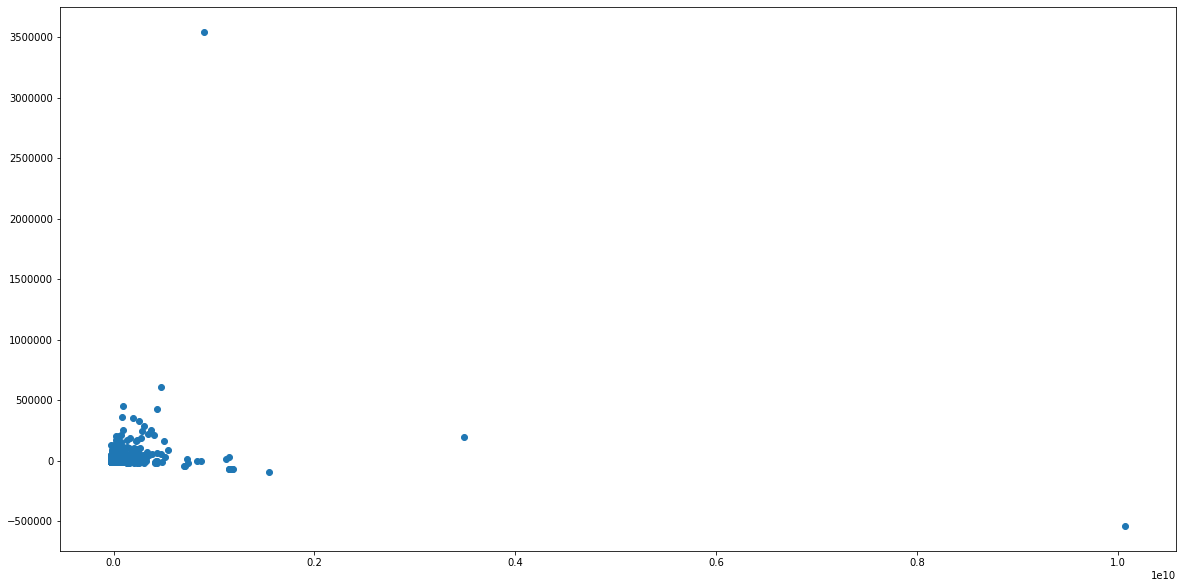

In [7]:
plt.figure(figsize =(20, 10)) 
plt.scatter(data_pca['P1'], data_pca['P2']) 
plt.show() 

In [8]:
## There are 3 outliers 11595357, 19101743, 19276785
data_train_pos[top_50_columns[:numberofcols]+['US','company_id']].iloc[[318,3243,3317],:]

,internal_total,external_vs_internal,total_employees,total_200_features,emp2,per_feature_307,ind9,US,company_id
459,1.010192e+10,4.322079,85.0,214.0,0.0,0.742857,0.0,0.0,11595357
6832,3.516916e+09,2.784795,389000.0,70.0,0.0,0.875000,0.0,1.0,19101743
6999,9.271773e+08,4.365230,3600000.0,144.0,0.0,0.346154,0.0,0.0,19276785


In [9]:
## Removing them
data_pca = data_pca[~data_pca.index.isin([318,3243,3317])]

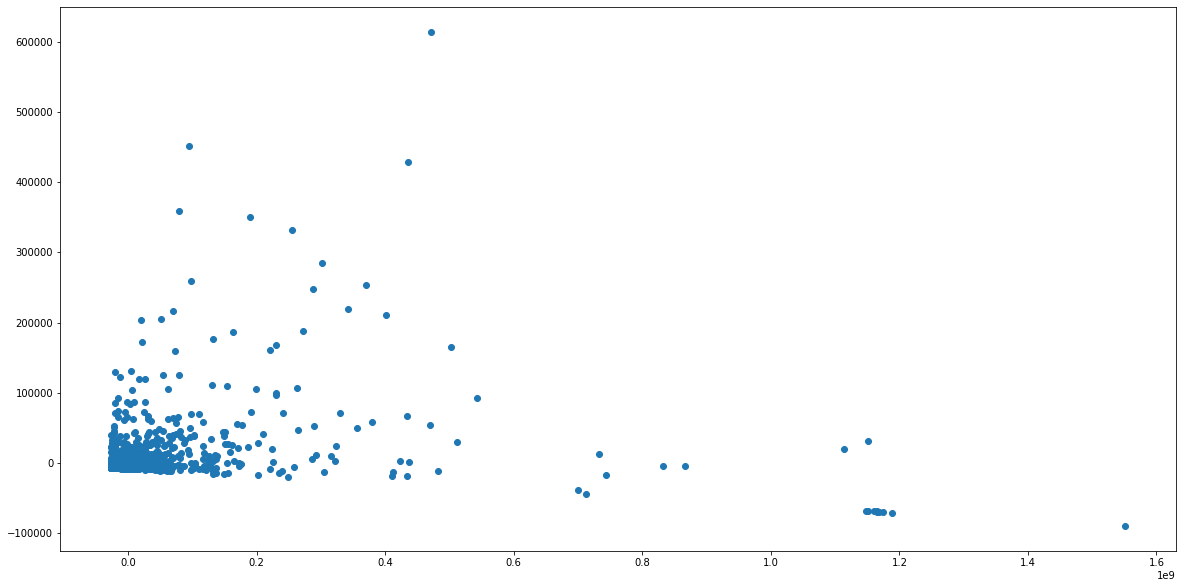

In [10]:
plt.figure(figsize =(20, 10)) 
plt.scatter(data_pca['P1'], data_pca['P2']) 
plt.show() 

## Removing outliers

In [11]:
data_train_pos_1 = data_train_pos[~data_train_pos['company_id'].isin([11595357,19101743,19276785])]

## Standardizing Again

In [12]:
scaler = StandardScaler()

data_train_pos_scaled = scaler.fit_transform(data_train_pos_1.drop(drop_columns,1))
data_train_pos_scaled = pd.concat([pd.DataFrame(data_train_pos_scaled, 
                                            columns=data_train_pos_1.drop(drop_columns,1).columns,
                                            index=data_train_pos_1.index),
                                data_train_pos_1[drop_columns]],1)



data_train_neg_scaled = scaler.transform(data_train_neg.drop(drop_columns,1))
data_train_neg_scaled = pd.concat([pd.DataFrame(data_train_neg_scaled, 
                                            columns=data_train_neg.drop(drop_columns,1).columns,
                                            index=data_train_neg.index),
                                data_train_neg[drop_columns]],1)

## Splitting Data into US/Non-US

In [13]:
data_train_pos_scaled_us = data_train_pos_scaled[data_train_pos_1['US']==1].reset_index().drop('index',1)
data_train_pos_scaled_nonus = data_train_pos_scaled[data_train_pos_1['US']==0].reset_index().drop('index',1)

data_train_neg_scaled_us = data_train_neg_scaled[data_train_neg['US']==1].reset_index().drop('index',1)
data_train_neg_scaled_nonus = data_train_neg_scaled[data_train_neg['US']==0].reset_index().drop('index',1)

In [14]:
data_train_pos_scaled_us.to_csv("../data/clusteringPrep/data_train_pos_scaled_us.csv",index=False)
data_train_pos_scaled_nonus.to_csv("../data/clusteringPrep/data_train_pos_scaled_nonus.csv",index=False)
data_train_neg_scaled_us.to_csv("../data/clusteringPrep/data_train_neg_scaled_us.csv",index=False)
data_train_neg_scaled_nonus.to_csv("../data/clusteringPrep/data_train_neg_scaled_nonus.csv",index=False)
data_train_pos[data_train_pos.company_id.isin([19101743])].to_csv("../data/clusteringPrep/us_outliers.csv",index=False)
data_train_pos[data_train_pos.company_id.isin([11595357, 19276785])].to_csv("../data/clusteringPrep/nonus_outliers.csv",index=False)

In [15]:
joblib.dump(scaler, '../data/pkl/standardscaler.pkl')

['../data/pkl/standardscaler.pkl']

# 6. Clustering

In [1]:
import pandas as pd
import numpy as np
import scipy

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.externals import joblib 
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

## US Data

In [2]:
data_train_pos_scaled_us = pd.read_csv("../data/clusteringPrep/data_train_pos_scaled_us.csv")
data_train_neg_scaled_us = pd.read_csv("../data/clusteringPrep/data_train_neg_scaled_us.csv")

scaler = joblib.load("../data/pkl/standardscaler.pkl")

drop_columns = ['company_id','group','cloud_flag']
data_train_pos_us = scaler.inverse_transform(data_train_pos_scaled_us.drop(drop_columns,1))
data_train_pos_us = pd.concat([pd.DataFrame(data_train_pos_us, 
                                            columns=data_train_pos_scaled_us.drop(drop_columns,1).columns,
                                            index=data_train_pos_scaled_us.index),
                                data_train_pos_scaled_us[drop_columns]],1)
data_train_neg_us = scaler.inverse_transform(data_train_neg_scaled_us.drop(drop_columns,1))
data_train_neg_us = pd.concat([pd.DataFrame(data_train_neg_us, 
                                            columns=data_train_neg_scaled_us.drop(drop_columns,1).columns,
                                            index=data_train_neg_scaled_us.index),
                                data_train_neg_scaled_us[drop_columns]],1)

outlier = pd.read_csv("../data/clusteringPrep/us_outliers.csv")
outlier_scaled = pd.concat([pd.DataFrame(scaler.transform(outlier.drop(drop_columns,1)), 
                                            columns=outlier.drop(drop_columns,1).columns,
                                            index=outlier.index),
                                outlier[drop_columns]],1)

top_50_columns = ['internal_total','external_vs_internal','total_employees','total_200_features','emp2',
                  'per_feature_307','ind9','emp7']
numberofcols = 7

In [3]:
cluster_train = np.array(data_train_pos_scaled_us[top_50_columns[:numberofcols]])
cluster_test = np.array(data_train_neg_scaled_us[top_50_columns[:numberofcols]])
cluster_outlier_scaled = outlier_scaled[top_50_columns[:numberofcols]]
cluster_outlier = outlier[top_50_columns[:numberofcols]]

### K-Means Clustering

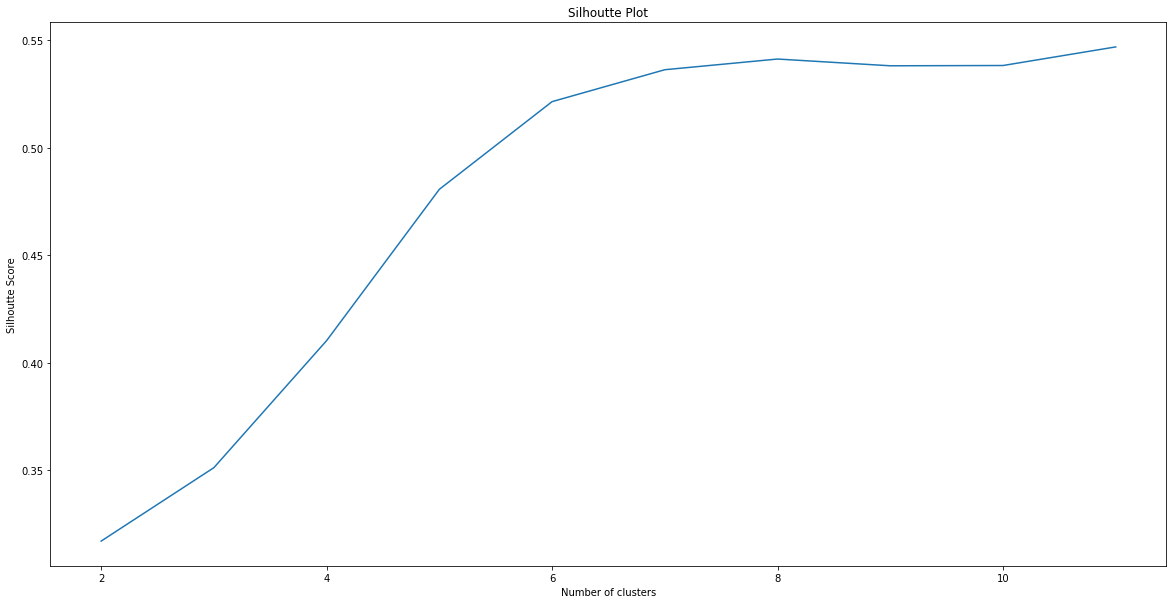

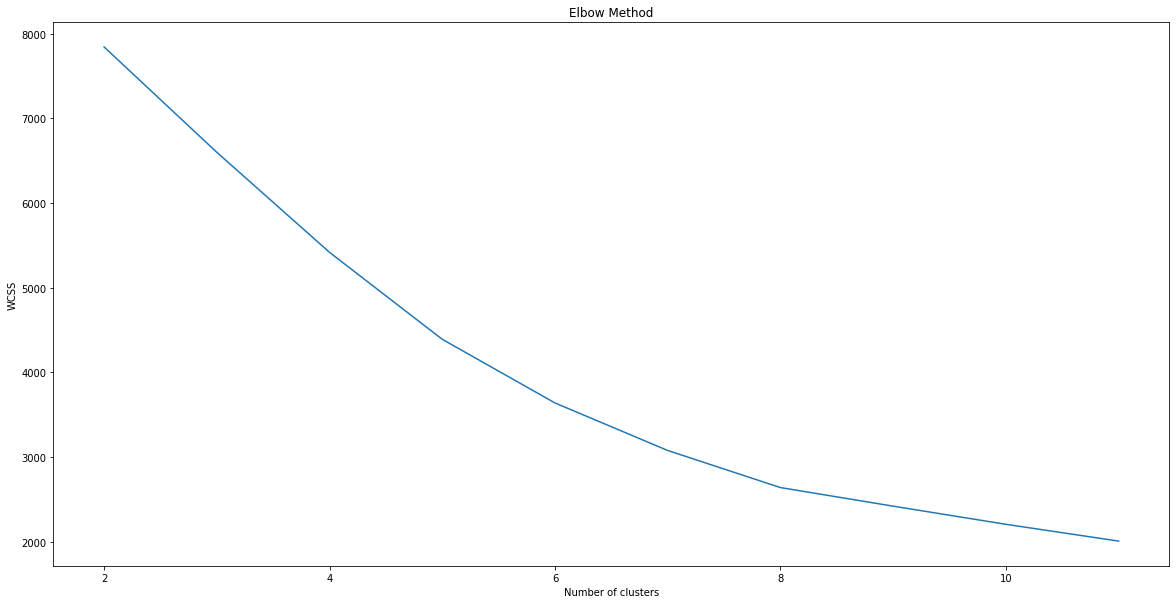

In [4]:
range_n_clusters = list(range(2,12))
wcss = []
silhoutte = []

for n_clusters in range_n_clusters:
    kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=10, random_state=10)
    kmeans_labels = kmeans_cluster.fit_predict(cluster_train)
    
    # WCSS
    wcss.append(kmeans_cluster.inertia_)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, kmeans_labels))
    
# Silhoutte Plot
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    
    
# Elbow Method
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(range_n_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [5]:
kmeans_cluster = KMeans(n_clusters=6, init='k-means++', max_iter=500, n_init=10, random_state=10)
kmeans_cluster.fit_transform(cluster_train)
kmeans_labels = kmeans_cluster.labels_

### Hierarchical Clustering

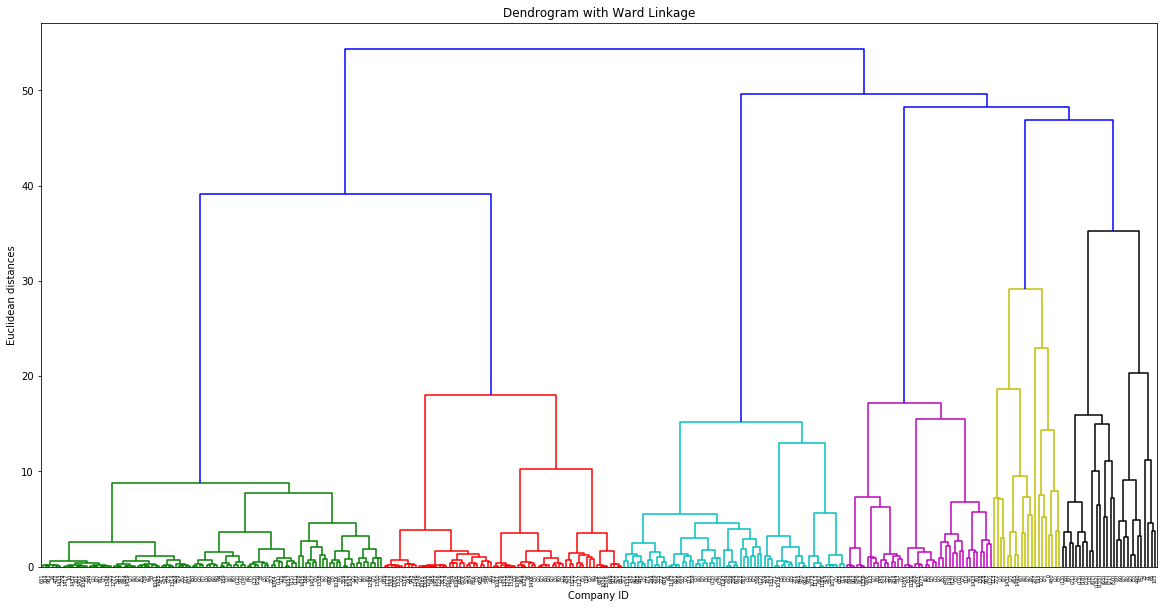

In [6]:
## Ward
linkage_ward = sch.linkage(cluster_train, method  = "ward")

sch.dendrogram(linkage_ward, truncate_mode = 'level', p=8)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Ward Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

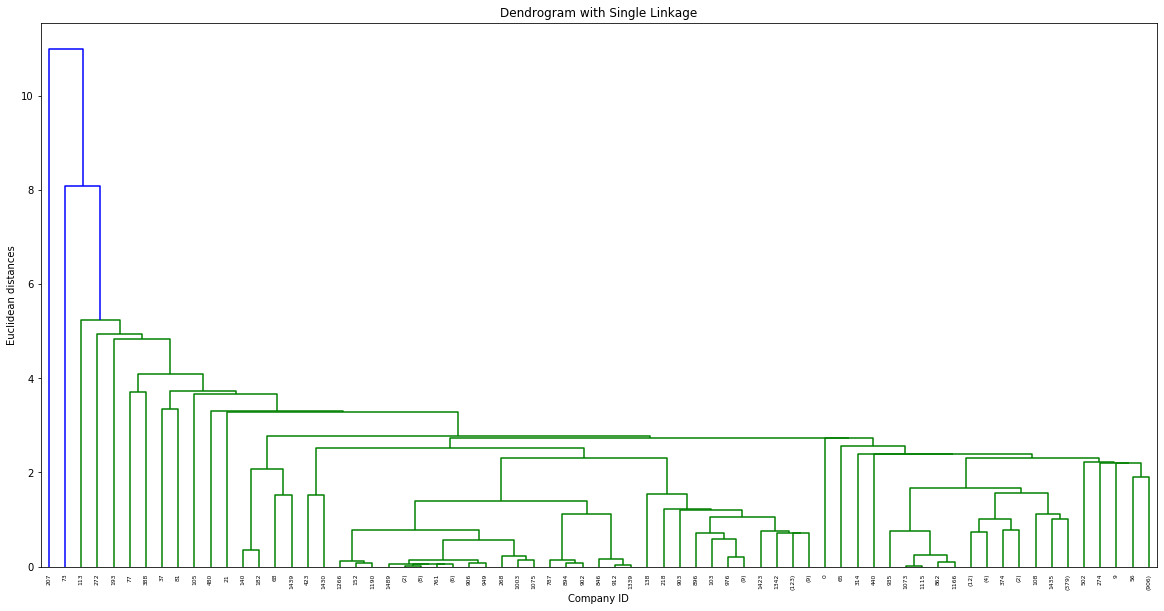

In [7]:
## Single
linkage_single = sch.linkage(cluster_train, method  = "single")

sch.dendrogram(linkage_single, truncate_mode = 'level', p=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Single Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

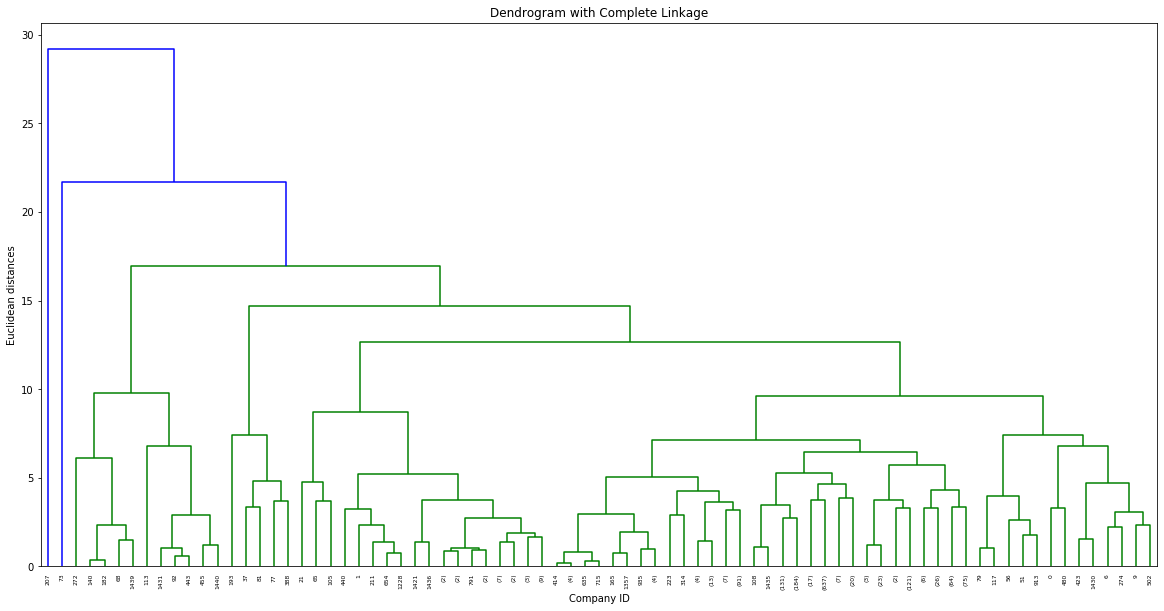

In [8]:
## Complete
linkage_complete = sch.linkage(cluster_train, method  = "complete")

sch.dendrogram(linkage_complete, truncate_mode = 'level', p=10) ##3
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Complete Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

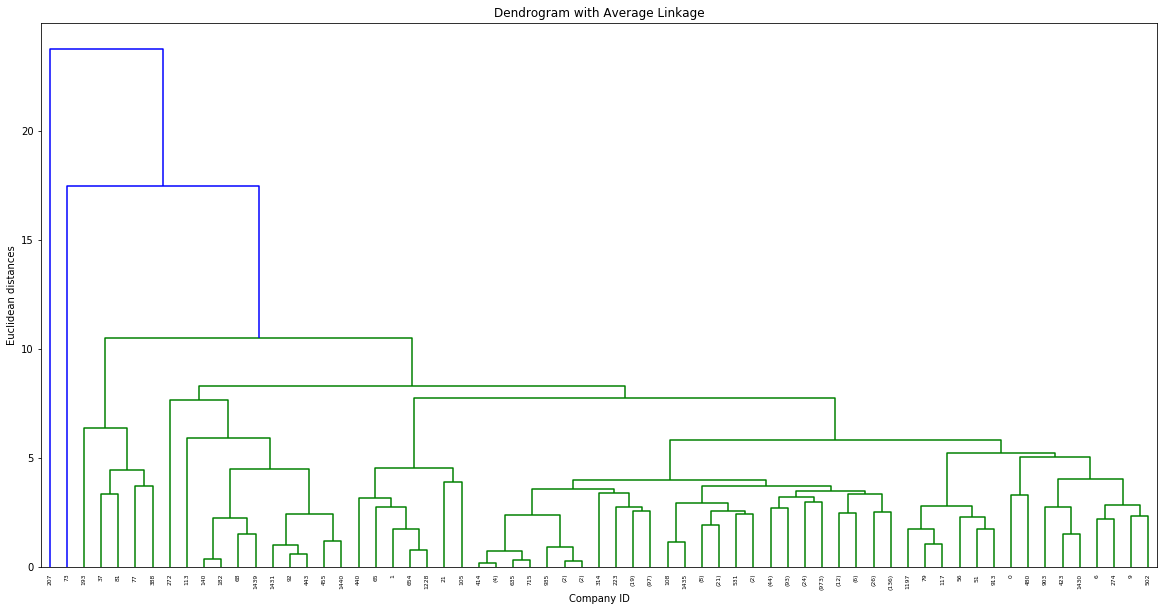

In [9]:
## Average
linkage_average = sch.linkage(cluster_train, method  = "average")

sch.dendrogram(linkage_average, truncate_mode = 'level', p=10) ##3
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Average Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
hierarchical_ward_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
hierarchical_ward_labels = hierarchical_ward_cluster.fit_predict(cluster_train)

hierarchical_single_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
hierarchical_single_labels = hierarchical_single_cluster.fit_predict(cluster_train)

hierarchical_complete_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
hierarchical_complete_labels = hierarchical_complete_cluster.fit_predict(cluster_train)

hierarchical_average_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
hierarchical_average_labels = hierarchical_average_cluster.fit_predict(cluster_train)

### Spectral Clustering

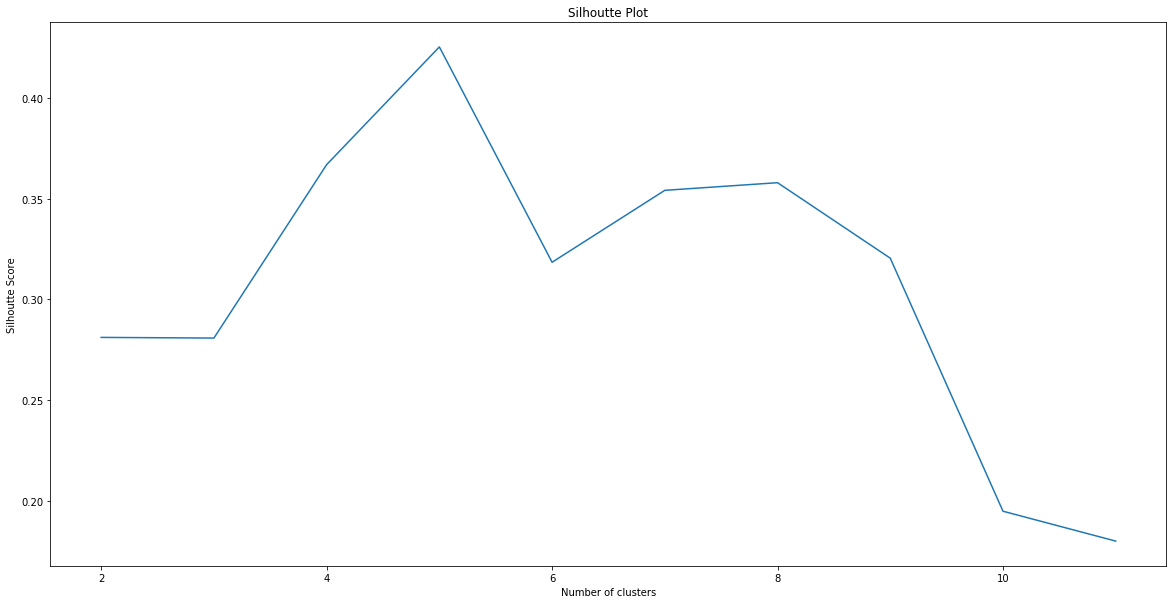

In [11]:
silhoutte = []

for n_clusters in range_n_clusters:
    spectral_nn_cluster = SpectralClustering(n_clusters=n_clusters,assign_labels='discretize',
                                             affinity='nearest_neighbors',random_state=10)
    spectral_nn_labels = spectral_nn_cluster.fit_predict(cluster_train)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, spectral_nn_labels))
    
# Silhoutte Plot
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    

In [12]:
spectral_nn_cluster = SpectralClustering(n_clusters=5, assign_labels='discretize',
                                         affinity='nearest_neighbors',random_state=10)
spectral_nn_labels = spectral_nn_cluster.fit_predict(cluster_train)

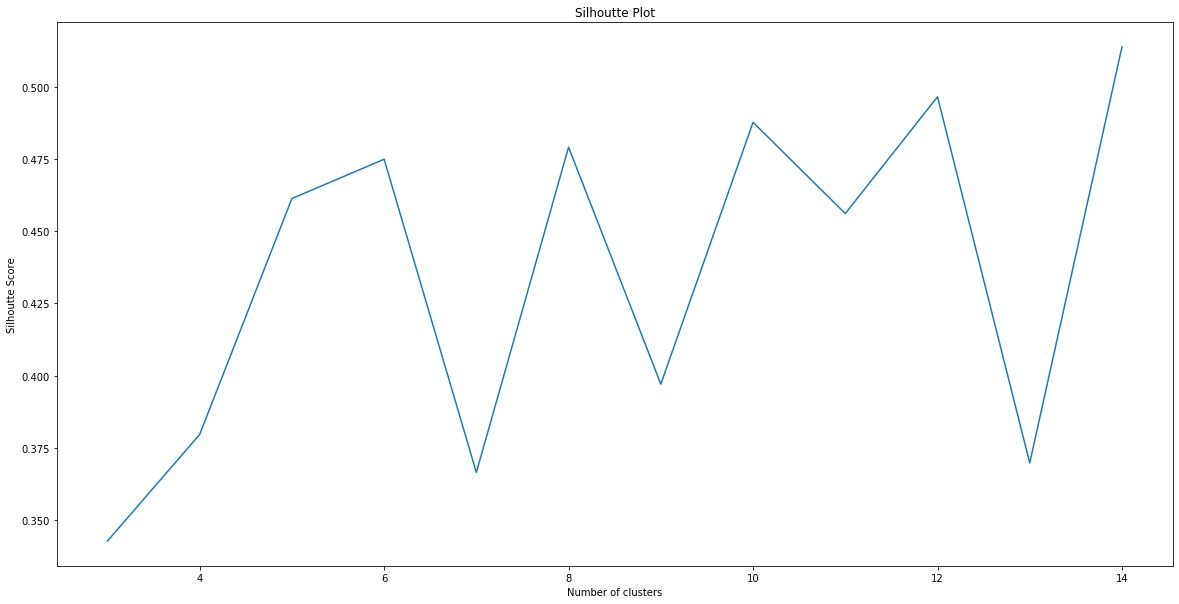

In [13]:
silhoutte = []
range_n_clusters = list(range(3,15))

for n_clusters in range_n_clusters:
    spectral_rbf_cluster = SpectralClustering(n_clusters=n_clusters, assign_labels='discretize', 
                                              affinity='rbf', gamma=1.0, random_state=10)
    spectral_rbf_labels = spectral_rbf_cluster.fit_predict(cluster_train)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, spectral_rbf_labels))
    
# Silhoutte Plot
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    

In [14]:
spectral_rbf_cluster = SpectralClustering(n_clusters=6,assign_labels='discretize',affinity='rbf',
                                          random_state=10,gamma=1)
spectral_rbf_labels = spectral_rbf_cluster.fit_predict(cluster_train)

### Gaussian Mixture Model

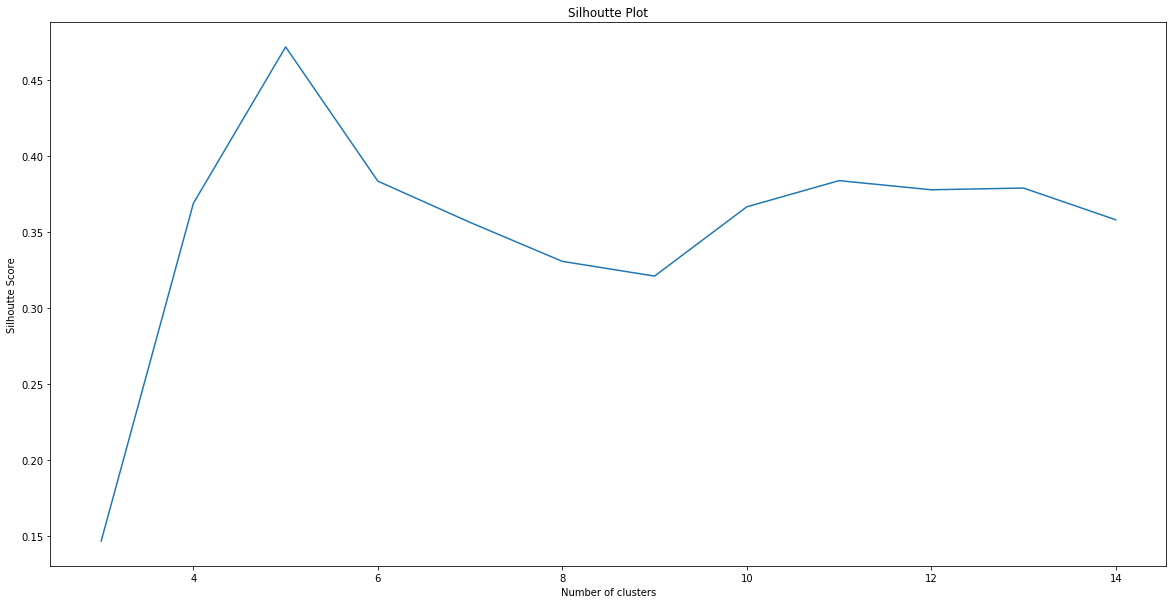

In [15]:
silhoutte = []

for n_clusters in range_n_clusters:
    gmm_cluster = GaussianMixture(n_components=n_clusters,random_state=10)
    gmm_labels = gmm_cluster.fit_predict(cluster_train)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, gmm_labels))
    
# Silhoutte Plot
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    

In [16]:
gmm_cluster = GaussianMixture(n_components=5,random_state=10)
gmm_labels = gmm_cluster.fit_predict(cluster_train)

### DBSCAN

In [17]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=50)
dbscan_labels = dbscan_cluster.fit_predict(cluster_train)

### Visualization

In [18]:
## PCA
pca = PCA(n_components=2) 
data_pca = pca.fit_transform(cluster_train) 
data_pca = pd.DataFrame(data_pca) 
data_pca.columns = ['P1', 'P2'] 
  
data_pca.head() 

,P1,P2
0,2.441632,-0.218598
1,3.845586,3.207394
2,0.591151,0.325594
3,1.220022,1.126824
4,0.987816,0.481192


In [19]:
def visualization(pca, labels):
    pca = pd.concat([data_pca,pd.DataFrame(kmeans_labels,columns=['label'])],1)
    hexs = ['blue','green','orange','red','grey','pink','violet','lightgreen']
    fig, ax = plt.subplots()
    for l in range(len(pca.loc[:,'label'].unique())):
        pca_temp = pca[pca['label']==l]
        ax.scatter(pca_temp['P1'], pca_temp['P2'], c=hexs[l], label=l)
    ax.legend()

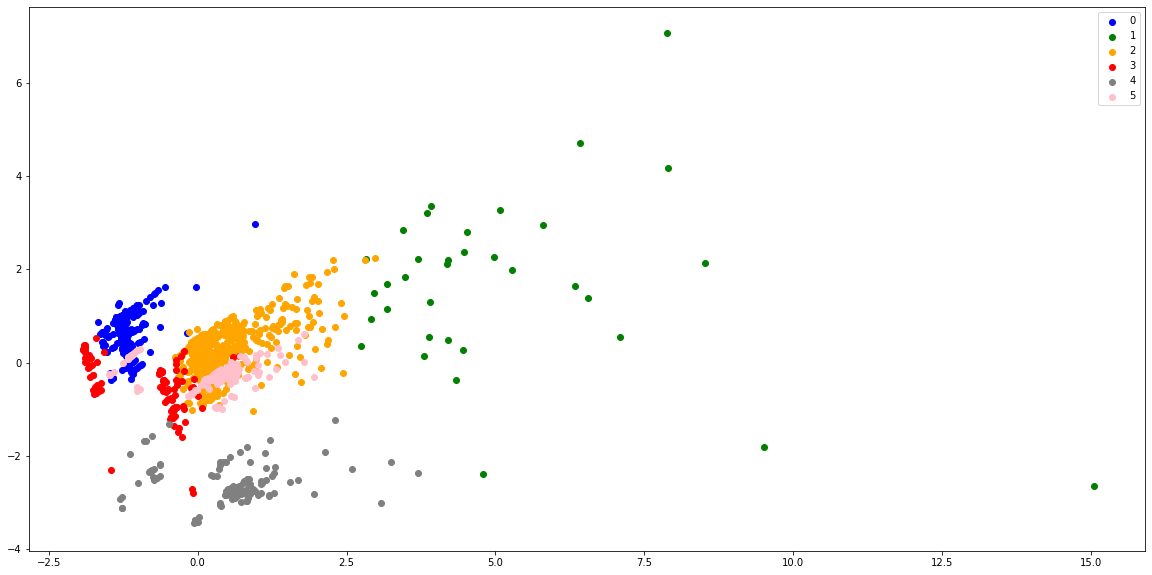

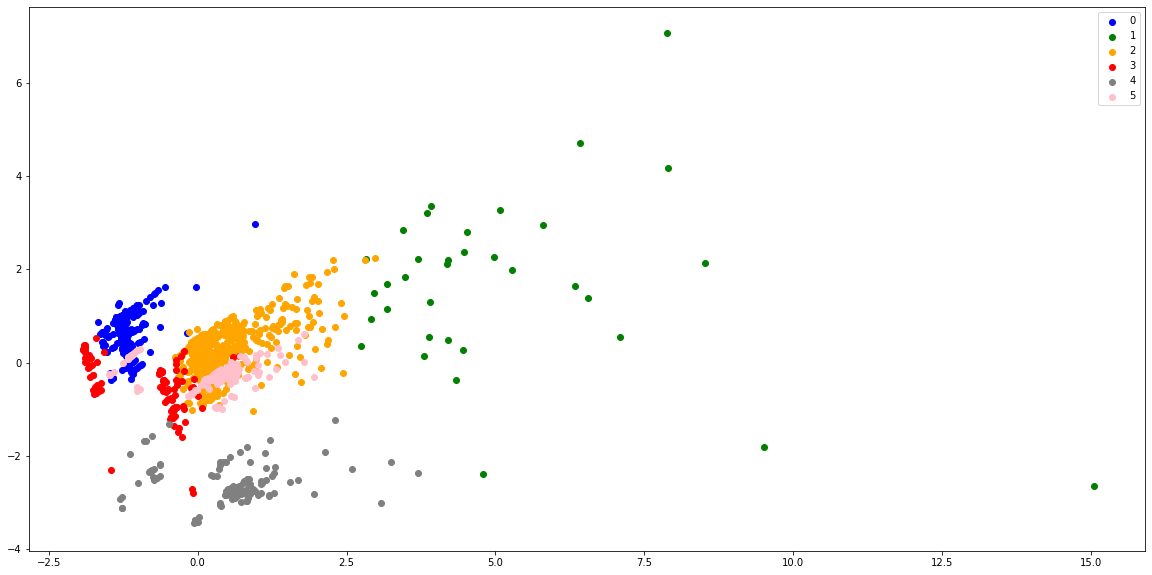

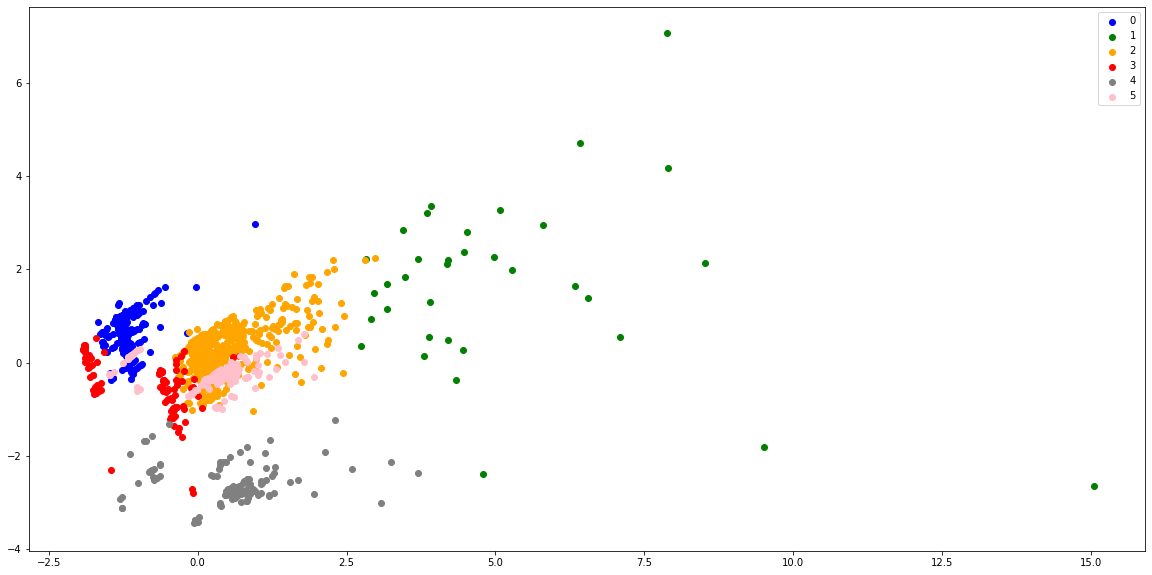

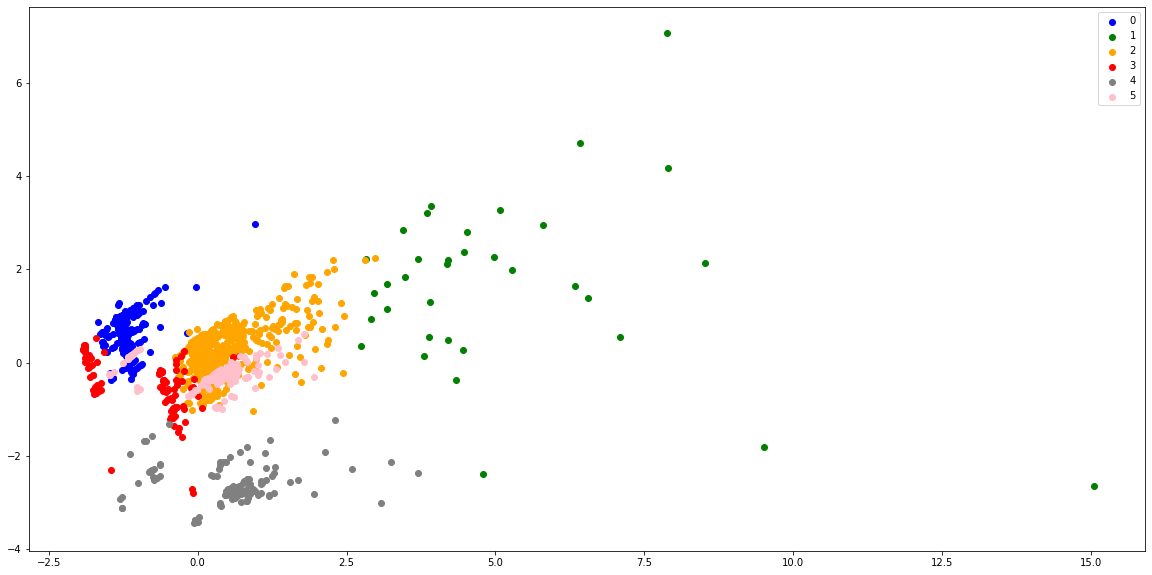

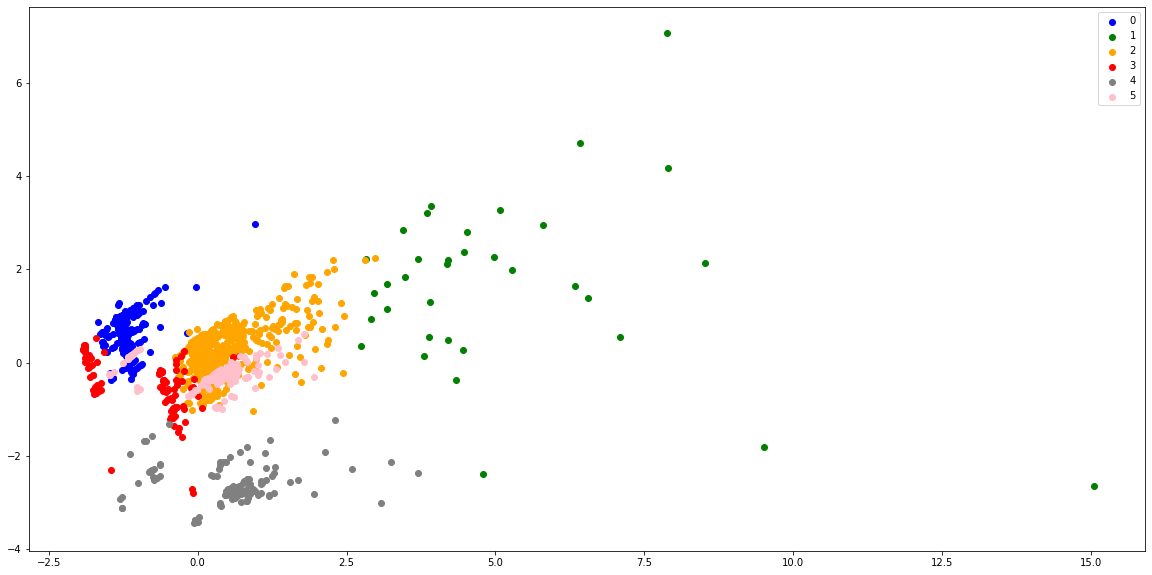

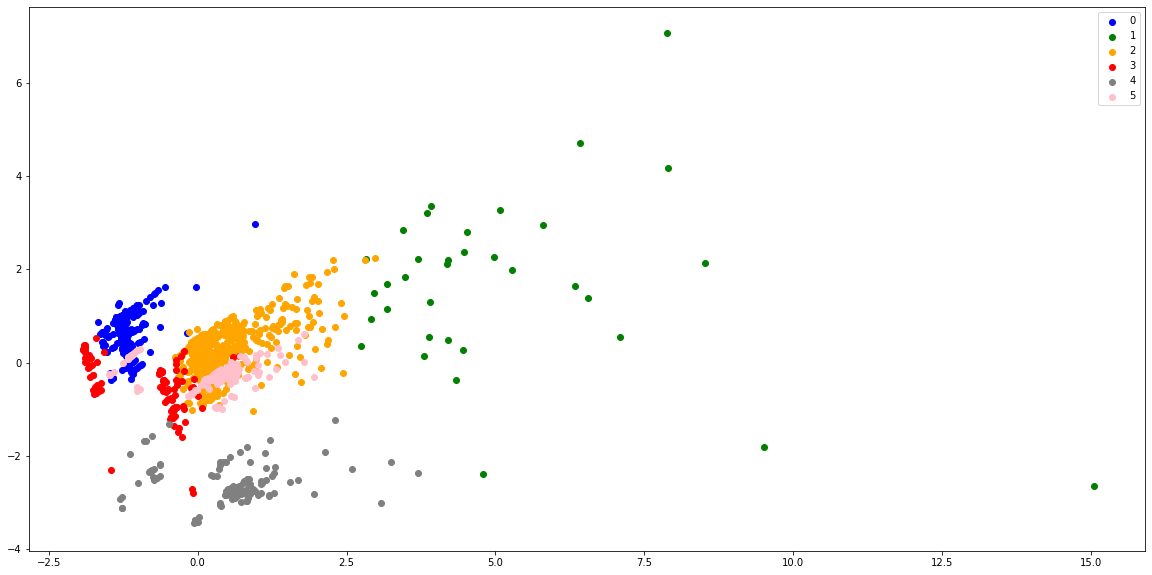

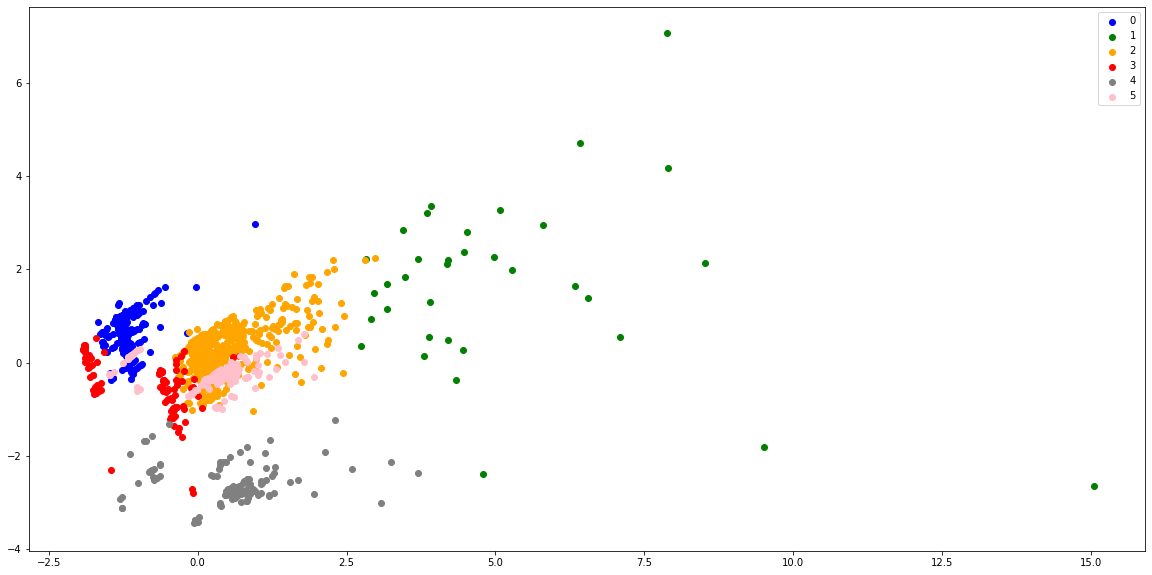

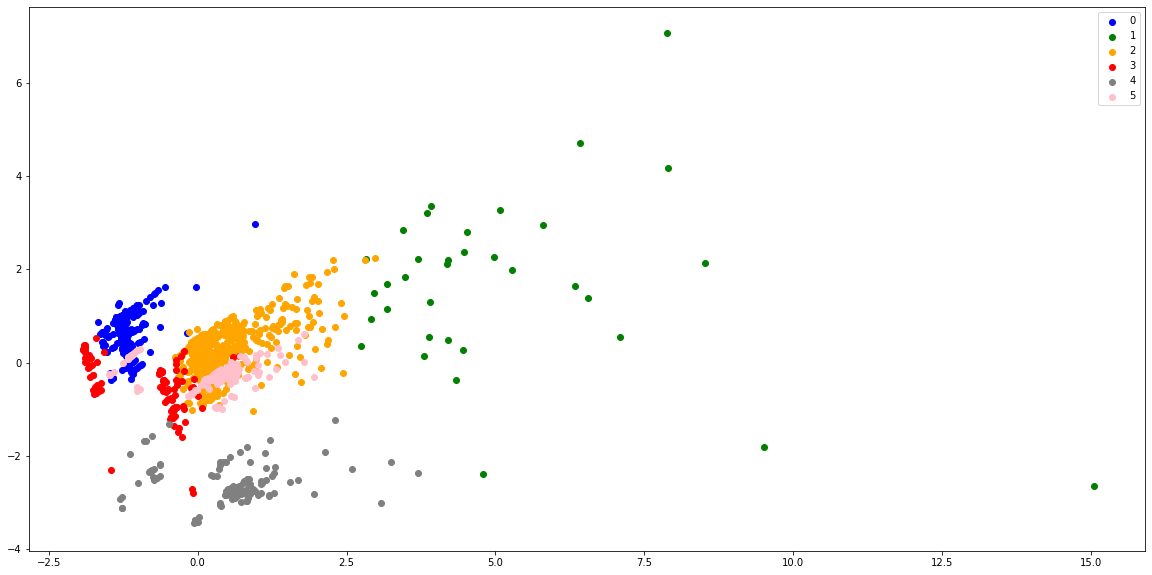

In [20]:
# K-Means
visualization(data_pca,kmeans_labels)

# Hierarchical Ward
visualization(data_pca,hierarchical_ward_labels)

# Hierarchical Complete
visualization(data_pca,hierarchical_complete_labels)

# Hierarchical Average
visualization(data_pca,hierarchical_average_labels)

# Spectral NN
visualization(data_pca,spectral_nn_labels)

# Spectral RBF
visualization(data_pca,spectral_rbf_labels)

# GMM
visualization(data_pca,gmm_labels)

# DBSCAN
visualization(data_pca,dbscan_labels)

### Interpretation

In [21]:
data_cluster_us = data_train_pos_scaled_us.copy()
data_cluster_inv_us = data_train_pos_us.copy()
data_cluster_us = data_cluster_us[top_50_columns[:numberofcols]]
data_cluster_inv_us = data_cluster_inv_us[top_50_columns[:numberofcols]]

data_cluster_us['cluster'] = gmm_labels.astype(int)
data_cluster_inv_us['cluster'] = gmm_labels.astype(int)

for row in range((cluster_outlier.shape[0])):
    cluster_outlier.loc[row,'cluster'] = int(len(np.unique(gmm_labels))+row)
    cluster_outlier_scaled.loc[row,'cluster'] = int(len(np.unique(gmm_labels))+row)
    
outlier_clusters = list(cluster_outlier['cluster'].unique().astype(int))

data_cluster_us = pd.concat([data_cluster_us,cluster_outlier_scaled],0).reset_index().drop('index',1)
data_cluster_inv_us = pd.concat([data_cluster_inv_us,cluster_outlier],0).reset_index().drop('index',1)

cluster 0: mod internal_total          | low external_vs_internal          | mod total_employees                |
           mod total_200_features      | does not belong to emp2           | does not belong to ind9
           
cluster 1: low internal_total          | high external_vs_internal         | mod total_employees                |
           low total_200_features      | does not belong to emp2           | does not belong to ind9
 
cluster 2: low internal_total          | low external_vs_internal          | low total_employees                |
           low total_200_features      | belongs to emp2                   | does not belong to ind9

cluster 3: mod internal_total          | low external_vs_internal          | mod total_employees                |
           low total_200_features      | does not belong to emp2           | belongs to ind9

cluster 4: high internal_total         | low external_vs_internal          | high total_employees               |
           high total_200_features     | does not belong to emp2           | does not belong to ind9

cluster 5: extreme internal_total      | low external_vs_internal          | extreme total_employees            |
           low total_200_features      | does not belong to emp2           | does not belong to ind9

In [22]:
data_cluster_inv_us.groupby('cluster').describe().round(2)

internal_total                                            \
                 count          mean           std           min   
cluster                                                            
0.0              753.0  1.836744e+07  3.265813e+07  7.568300e+04   
1.0              126.0  4.749162e+06  6.990319e+06  4.763300e+04   
2.0              379.0  1.818337e+06  1.805777e+06  9.415900e+04   
3.0              178.0  1.060276e+07  1.511373e+07  8.805800e+04   
4.0               82.0  2.243146e+08  2.388553e+08  3.565191e+06   
5.0                1.0  3.516916e+09           NaN  3.516916e+09   

                                                                 \
                  25%           50%           75%           max   
cluster                                                           
0.0      1.677259e+06  5.179952e+06  1.984355e+07  2.020321e+08   
1.0      5.682152e+05  1.839322e+06  4.684732e+06  3.236957e+07   
2.0      6.826420e+05  1.201531e+06  2.350330e+06  1.151495e+07   
3.0      1.472032e+06  3.964414e+06  1.250844e+07  9.499683e+07   
4.0      4.465639e+07  1.556844e+08  3.152534e+08  1.216034e+09   
5.0      3.516916e+09  3.516916e+09  3.516916e+09  3.516916e+09   

        external_vs_internal        ... per_feature_307         ind9        \
                       count  mean  ...             75%   max  count  mean   
cluster                             ...                                      
0.0                    753.0  2.66  ...            1.00  1.00  753.0  0.00   
1.0                    126.0  7.48  ...            1.00  1.00  126.0  0.00   
2.0                    379.0  2.62  ...            1.00  1.00  379.0  0.00   
3.0                    178.0  3.05  ...            1.00  1.00  178.0  1.00   
4.0                     82.0  3.43  ...            1.00  1.00   82.0  0.07   
5.0                      1.0  2.78  ...            0.88  0.88    1.0  0.00   

                                        
          std  min  25%  50%  75%  max  
cluster                                 
0.0      0.00  0.0  0.0  0.0  0.0  0.0  
1.0      0.00  0.0  0.0  0.0  0.0  0.0  
2.0      0.00  0.0  0.0  0.0  0.0  0.0  
3.0      0.00  1.0  1.0  1.0  1.0  1.0  
4.0      0.26  0.0  0.0  0.0  0.0  1.0  
5.0       NaN  0.0  0.0  0.0  0.0  0.0  

[6 rows x 56 columns]

In [23]:
def cluster_distance_summary(data):
    cluster_mean = data.groupby("cluster").mean().reset_index()
    cluster_distance_dict = {}
    cluster_distance = pd.DataFrame()
    for c in list(data.cluster.unique()):
        temp_cluster_data = data[data.cluster==c].reset_index().drop(['index','cluster'],1)
        temp_cluster_mean = cluster_mean[cluster_mean.cluster==c].reset_index().drop(['index','cluster'],1)
        distance = scipy.spatial.distance.cdist(temp_cluster_data, temp_cluster_mean, 'euclidean')
        cluster_distance_dict.update({'cluster':str(int(c)),'mean':distance.mean(),'max':distance.max(),
                                      'min':distance.min(),'std':distance.std(),
                                      'median':np.median(distance),'meansd':distance.mean()+2*distance.std(),
                                      'oneq':np.quantile(distance,0.25)})
        cluster_distance = cluster_distance.append(cluster_distance_dict,ignore_index=True)
    return cluster_distance

In [24]:
cluster_summary_us = cluster_distance_summary(data_cluster_us)
cluster_summary_us = cluster_summary_us.sort_values('cluster')
cluster_summary_us.index = cluster_summary_us.cluster
cluster_summary_us = cluster_summary_us.drop('cluster',1)

for cluster in outlier_clusters:
    cluster_summary_us.iloc[cluster,] = cluster_summary_us.sort_values('meansd',ascending=False).iloc[0]
    
cluster_summary_us

,max,mean,meansd,median,min,oneq,std
cluster,,,,,,,
0,4.098950,1.024472,2.469810,0.729797,0.193852,0.616498,0.722669
1,3.470909,1.254060,2.795600,0.846509,0.455230,0.723168,0.770770
2,2.895709,1.010180,2.435732,0.704692,0.101851,0.612578,0.712776
3,3.410835,1.274673,2.722878,0.944658,0.467952,0.745916,0.724103
4,21.109724,4.362717,10.464673,3.581429,1.190989,2.564659,3.050978
5,21.109724,4.362717,10.464673,3.581429,1.190989,2.564659,3.050978


In [25]:
def find_cluster(train_data,test_data,summary,num_clusters,index):
    clusters = np.empty(test_data.shape[0],np.int8)
    distances = np.empty(test_data.shape[0],np.float16)
    cluster_mean = train_data.groupby("cluster").mean().reset_index()
    for row in range(test_data.shape[0]):
        a = np.array(cluster_mean.iloc[:,1:])
        b = test_data[row,]
        b = b.reshape((-1,b.shape[0]))
        distance = scipy.spatial.distance.cdist(a, b, 'euclidean')
        check_cluster = summary['oneq'].values.reshape((num_clusters,-1))-distance
        cluster = np.where(check_cluster > 0, distance, np.inf)
        if(cluster.min()==np.inf):
            clusters[row]=100
            distances[row] = np.nan
        else:
            clusters[row] = cluster.argmin()
            distances[row] = distance[cluster.argmin()]
    test_data = pd.DataFrame(test_data,columns=top_50_columns[:numberofcols],index=index)
    test_data['cluster'] = clusters
    test_data['distance'] = distances
    return test_data

In [26]:
data_cluster_test_us = find_cluster(data_cluster_us,cluster_test,cluster_summary_us,data_cluster_us.cluster.nunique(),
                                    data_train_neg_scaled_us.index)
data_cluster_test_us.cluster.value_counts()

100    560
2      113
0       60
3       19
1        8
4        2
Name: cluster, dtype: int64

In [27]:
def get_distance(data):
    distances = np.empty(data.shape[0],np.float16)
    cluster_mean = data.groupby("cluster").mean().reset_index()
    for row in range(data.shape[0]):
        a = data.iloc[row,]
        b = np.array(cluster_mean.iloc[int(a['cluster']),:])
        a = np.array(a).reshape((-1,a.shape[0]))
        b = b.reshape((-1,b.shape[0]))
        distance = scipy.spatial.distance.cdist(np.array(a), b, 'euclidean')
        distances[row] = distance[0][0]
    data['distance'] = distances
    return data

In [28]:
data_cluster_us = get_distance(data_cluster_us)

In [29]:
data_final_us = pd.concat([data_train_pos_us,outlier,data_train_neg_us],0)[data_train_pos_us.columns].reset_index().drop('index',1)
data_cluster_final_us = pd.concat([data_cluster_us,data_cluster_test_us],0).reset_index().drop('index',1)

data_final_us['cluster'] = data_cluster_final_us['cluster']
data_final_us['distance'] = data_cluster_final_us['distance']

In [30]:
data_final_us.to_csv('../data/clustering/us_data_cluster_predictions.csv',index=False)
cluster_summary_us.to_csv('../data/clustering/cluster_summary_us.csv',index=False)
data_cluster_us.to_csv('../data/clustering/data_cluster_us.csv',index=False)
joblib.dump(gmm_cluster, '../data/pkl/gmm_cluster_us.pkl')

['../data/pkl/gmm_cluster_us.pkl']

## Non-US Data

In [31]:
data_train_pos_scaled_nonus = pd.read_csv("../data/clusteringPrep/data_train_pos_scaled_nonus.csv")
data_train_neg_scaled_nonus = pd.read_csv("../data/clusteringPrep/data_train_neg_scaled_nonus.csv")

scaler = joblib.load("../data/pkl/standardscaler.pkl")

drop_columns = ['company_id','group','cloud_flag']
data_train_pos_nonus = scaler.inverse_transform(data_train_pos_scaled_nonus.drop(drop_columns,1))
data_train_pos_nonus = pd.concat([pd.DataFrame(data_train_pos_nonus, 
                                            columns=data_train_pos_scaled_nonus.drop(drop_columns,1).columns,
                                            index=data_train_pos_scaled_nonus.index),
                                data_train_pos_scaled_nonus[drop_columns]],1)
data_train_neg_nonus = scaler.inverse_transform(data_train_neg_scaled_nonus.drop(drop_columns,1))
data_train_neg_nonus = pd.concat([pd.DataFrame(data_train_neg_nonus, 
                                            columns=data_train_neg_scaled_nonus.drop(drop_columns,1).columns,
                                            index=data_train_neg_scaled_nonus.index),
                                data_train_neg_scaled_nonus[drop_columns]],1)

outlier = pd.read_csv("../data/clusteringPrep/nonus_outliers.csv")
outlier_scaled = pd.concat([pd.DataFrame(scaler.transform(outlier.drop(drop_columns,1)), 
                                            columns=outlier.drop(drop_columns,1).columns,
                                            index=outlier.index),
                                outlier[drop_columns]],1)

top_50_columns = ['internal_total','external_vs_internal','total_employees','total_200_features','emp2',
                  'per_feature_307','ind9','emp7']
numberofcols = 7

In [32]:
cluster_train = np.array(data_train_pos_scaled_nonus[top_50_columns[:numberofcols]])
cluster_test = np.array(data_train_neg_scaled_nonus[top_50_columns[:numberofcols]])
cluster_outlier_scaled = outlier_scaled[top_50_columns[:numberofcols]]
cluster_outlier = outlier[top_50_columns[:numberofcols]]

### K-Means Clustering

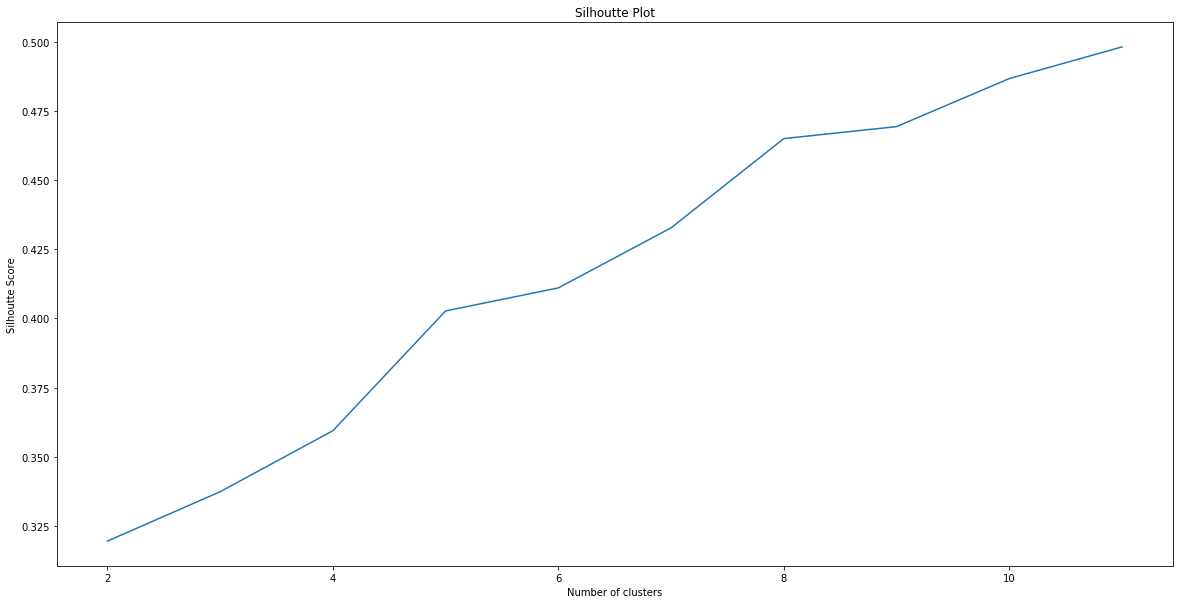

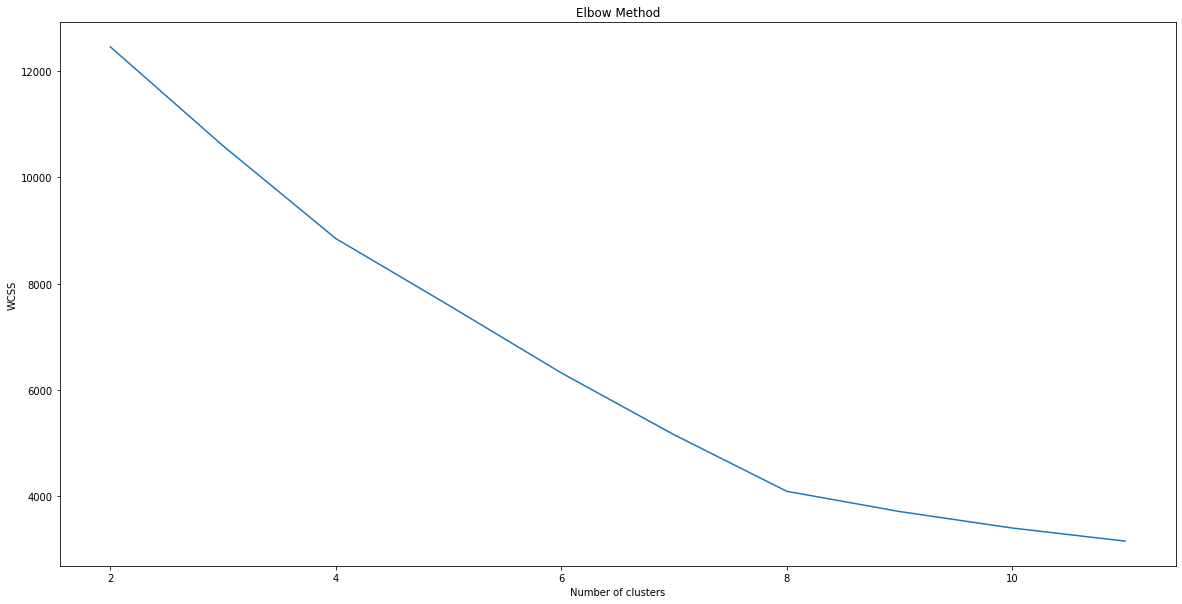

In [33]:
range_n_clusters = list(range(2,12))
wcss = []
silhoutte = []

for n_clusters in range_n_clusters:
    kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=10, random_state=10)
    kmeans_labels = kmeans_cluster.fit_predict(cluster_train)
    
    # WCSS
    wcss.append(kmeans_cluster.inertia_)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, kmeans_labels))
    
# Silhoutte Plot
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    
    
# Elbow Method
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(range_n_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [34]:
kmeans_cluster = KMeans(n_clusters=8, init='k-means++', max_iter=500, n_init=10, random_state=10)
kmeans_cluster.fit_transform(cluster_train)
kmeans_labels = kmeans_cluster.labels_

### Hierarchical Clustering

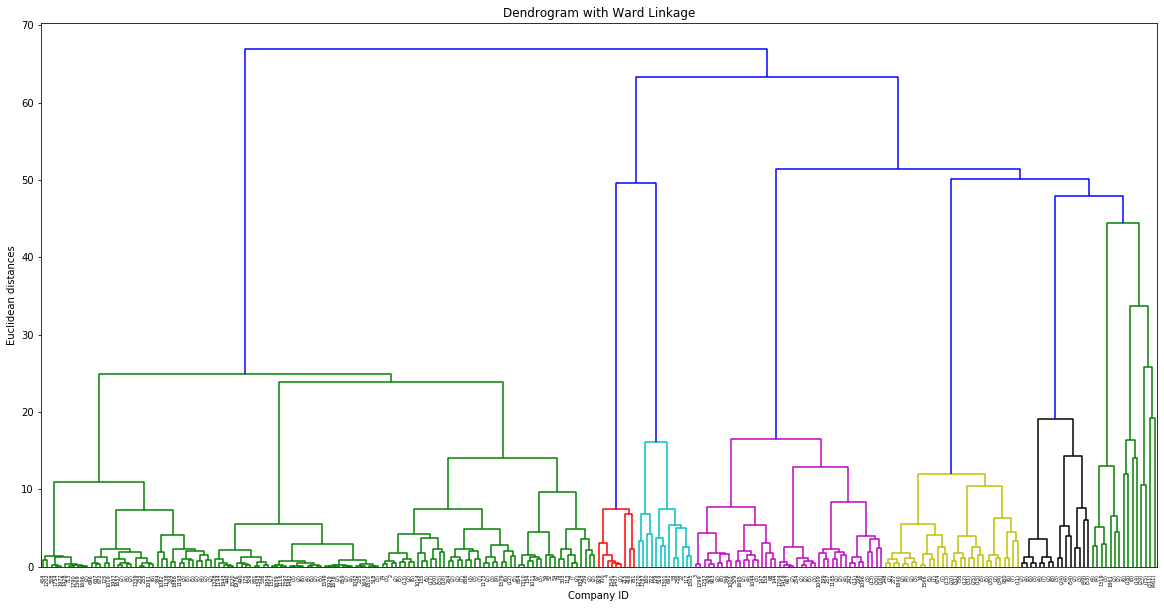

In [35]:
## Ward
linkage_ward = sch.linkage(cluster_train, method  = "ward")

sch.dendrogram(linkage_ward, truncate_mode = 'level', p=8)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Ward Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

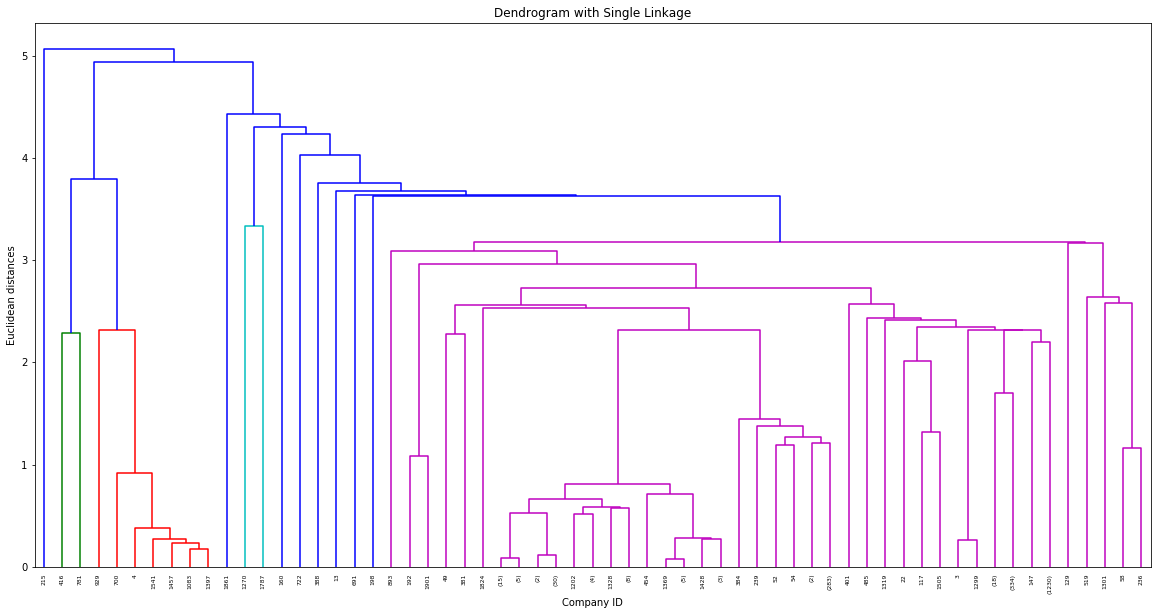

In [36]:
## Single
linkage_single = sch.linkage(cluster_train, method  = "single")

sch.dendrogram(linkage_single, truncate_mode = 'level', p=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Single Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

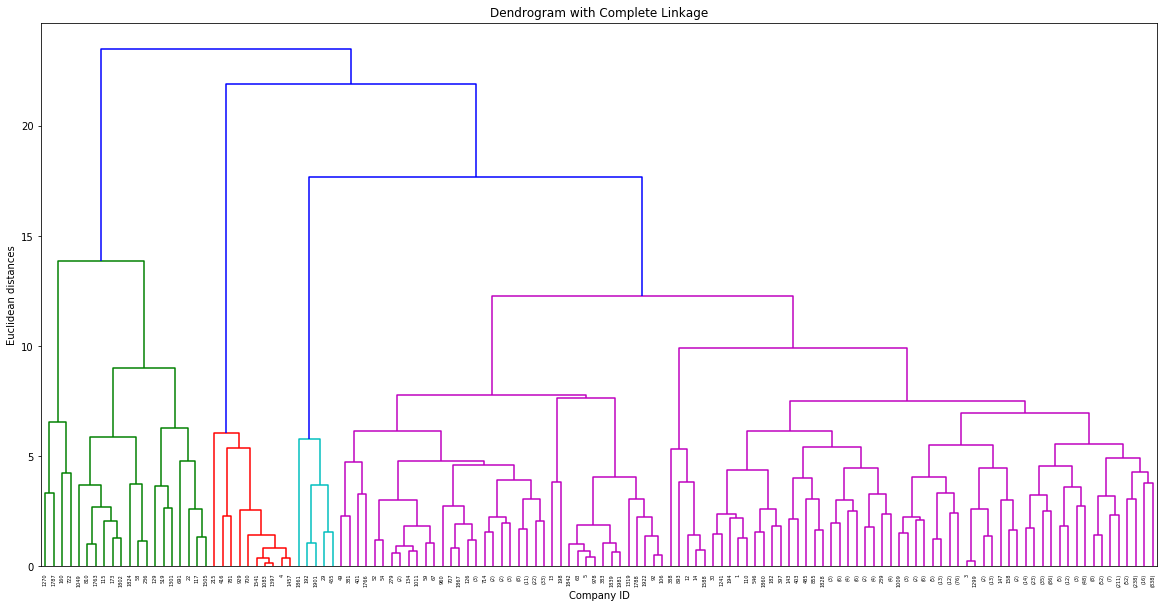

In [37]:
## Complete
linkage_complete = sch.linkage(cluster_train, method  = "complete")

sch.dendrogram(linkage_complete, truncate_mode = 'level', p=10) ##3
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Complete Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

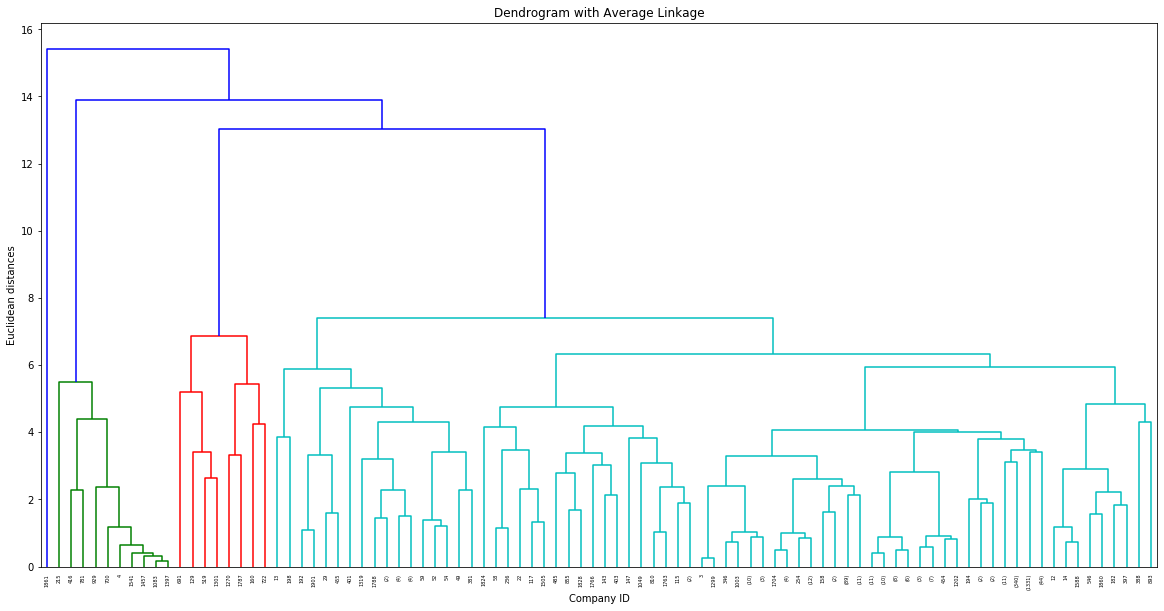

In [38]:
## Average
linkage_average = sch.linkage(cluster_train, method  = "average")

sch.dendrogram(linkage_average, truncate_mode = 'level', p=10) ##3
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Dendrogram with Average Linkage')
plt.xlabel('Company ID')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
hierarchical_ward_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical_ward_labels = hierarchical_ward_cluster.fit_predict(cluster_train)

hierarchical_single_cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='single')  
hierarchical_single_labels = hierarchical_single_cluster.fit_predict(cluster_train)

hierarchical_complete_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
hierarchical_complete_labels = hierarchical_complete_cluster.fit_predict(cluster_train)

hierarchical_average_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
hierarchical_average_labels = hierarchical_average_cluster.fit_predict(cluster_train)

### Spectral Clustering

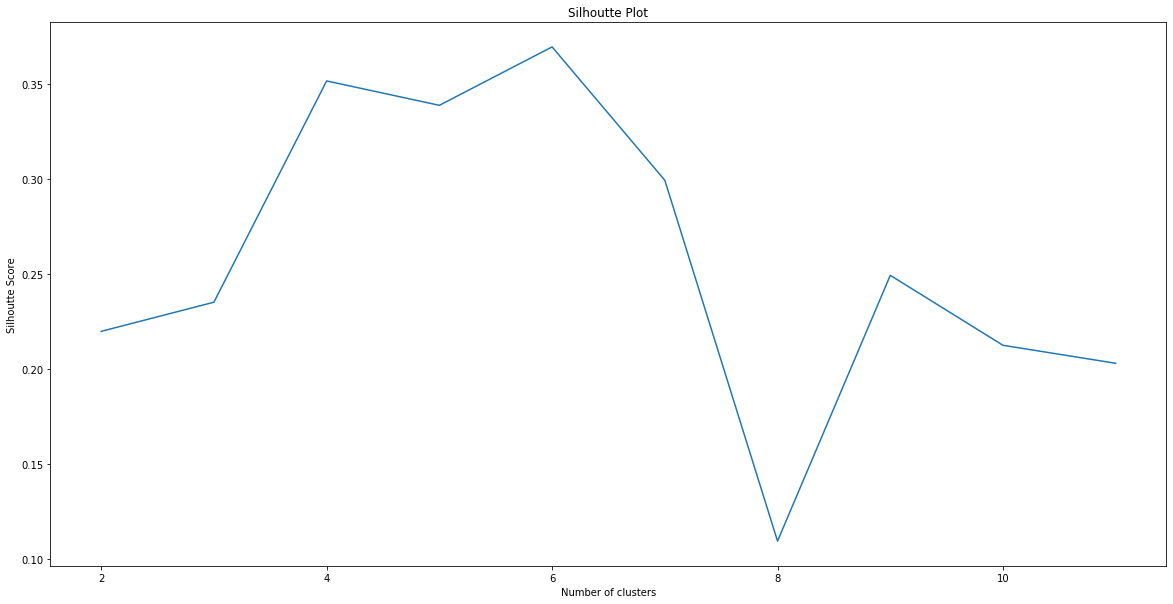

In [40]:
silhoutte = []

for n_clusters in range_n_clusters:
    spectral_nn_cluster = SpectralClustering(n_clusters=n_clusters,assign_labels='discretize',
                                             affinity='nearest_neighbors',random_state=10)
    spectral_nn_labels = spectral_nn_cluster.fit_predict(cluster_train)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, spectral_nn_labels))
    
# Silhoutte Plot
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    

In [41]:
spectral_nn_cluster = SpectralClustering(n_clusters=6, assign_labels='discretize',
                                         affinity='nearest_neighbors',random_state=10)
spectral_nn_labels = spectral_nn_cluster.fit_predict(cluster_train)

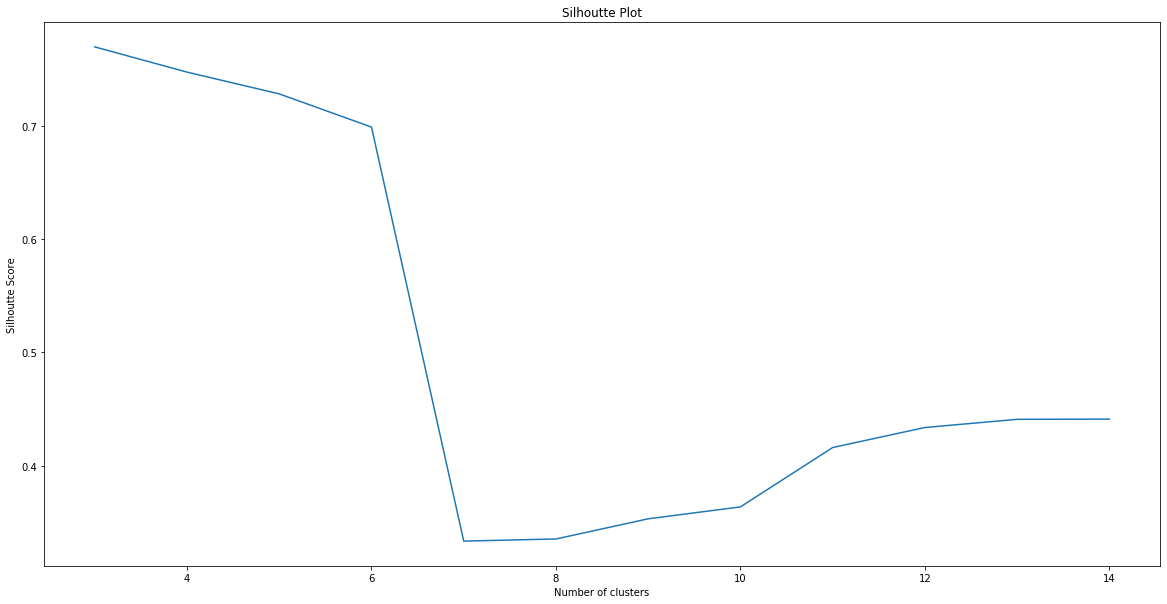

In [42]:
silhoutte = []
range_n_clusters = list(range(3,15))

for n_clusters in range_n_clusters:
    spectral_rbf_cluster = SpectralClustering(n_clusters=n_clusters, assign_labels='discretize', 
                                              affinity='rbf', gamma=1.0, random_state=10)
    spectral_rbf_labels = spectral_rbf_cluster.fit_predict(cluster_train)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, spectral_rbf_labels))
    
# Silhoutte Plot
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    

In [43]:
spectral_rbf_cluster = SpectralClustering(n_clusters=6,assign_labels='discretize',affinity='rbf',
                                          random_state=10,gamma=1)
spectral_rbf_labels = spectral_rbf_cluster.fit_predict(cluster_train)

### Gaussian Mixture Model

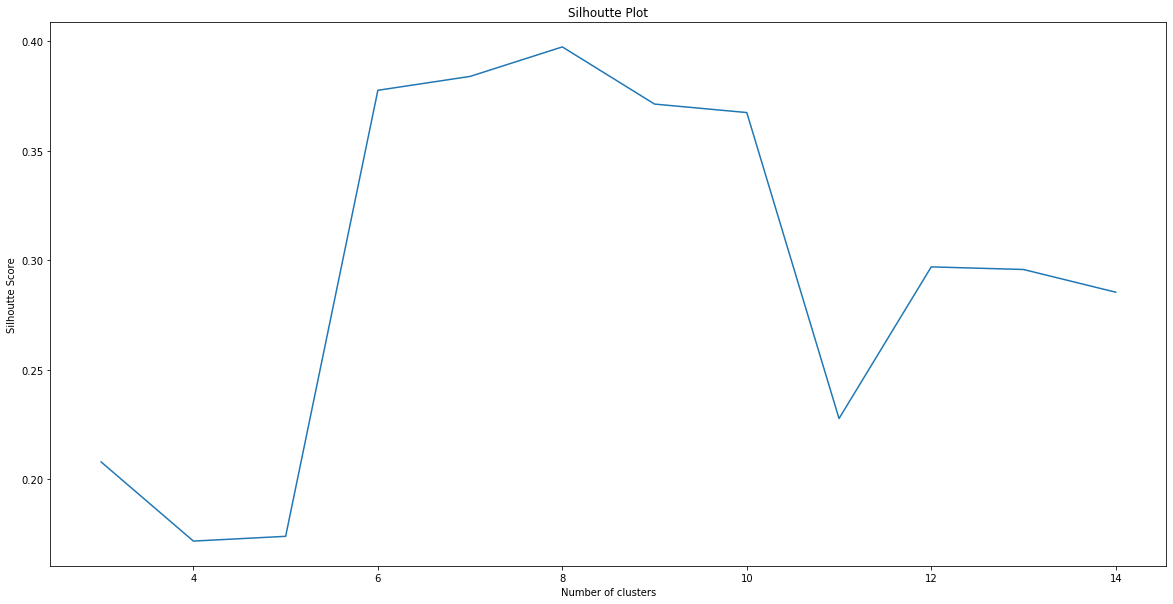

In [44]:
silhoutte = []

for n_clusters in range_n_clusters:
    gmm_cluster = GaussianMixture(n_components=n_clusters,random_state=10)
    gmm_labels = gmm_cluster.fit_predict(cluster_train)

    # Silhouette Score
    silhoutte.append(silhouette_score(cluster_train, gmm_labels))
    
# Silhoutte Plot
plt.plot(range_n_clusters, silhoutte)
plt.title('Silhoutte Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()    

In [45]:
gmm_cluster = GaussianMixture(n_components=8,random_state=10)
gmm_labels = gmm_cluster.fit_predict(cluster_train)

### DBSCAN

In [46]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=50)
dbscan_labels = dbscan_cluster.fit_predict(cluster_train)

### Visualization

In [47]:
## PCA
pca = PCA(n_components=2) 
data_pca = pca.fit_transform(cluster_train) 
data_pca = pd.DataFrame(data_pca) 
data_pca.columns = ['P1', 'P2'] 
  
data_pca.head() 

,P1,P2
0,-1.145088,1.945389
1,1.709420,0.451142
2,-0.004915,1.816711
3,-0.692464,-0.708689
4,8.151655,0.123972


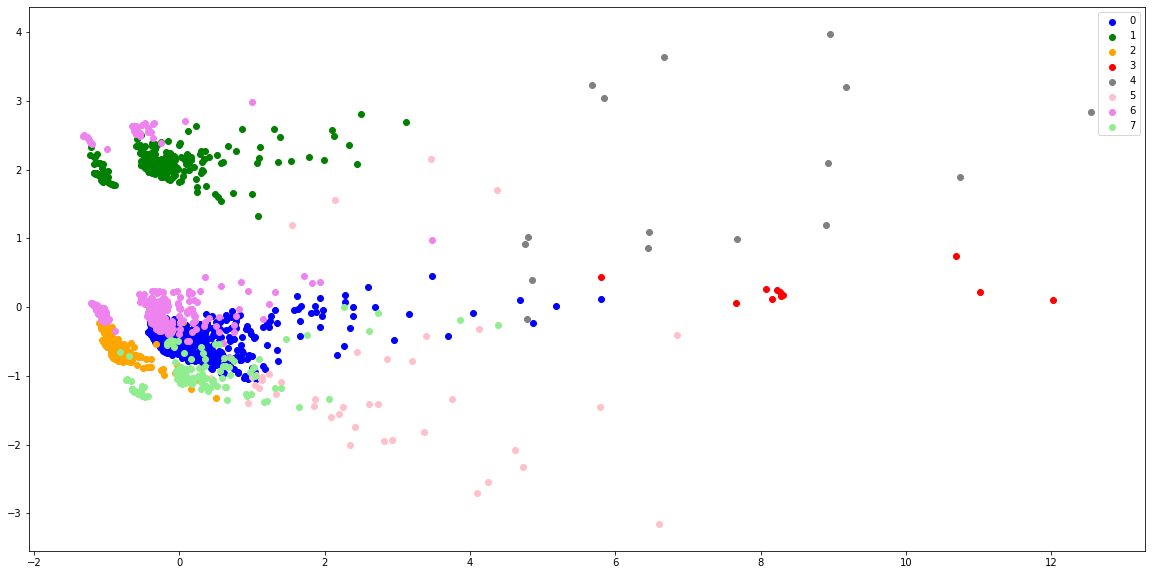

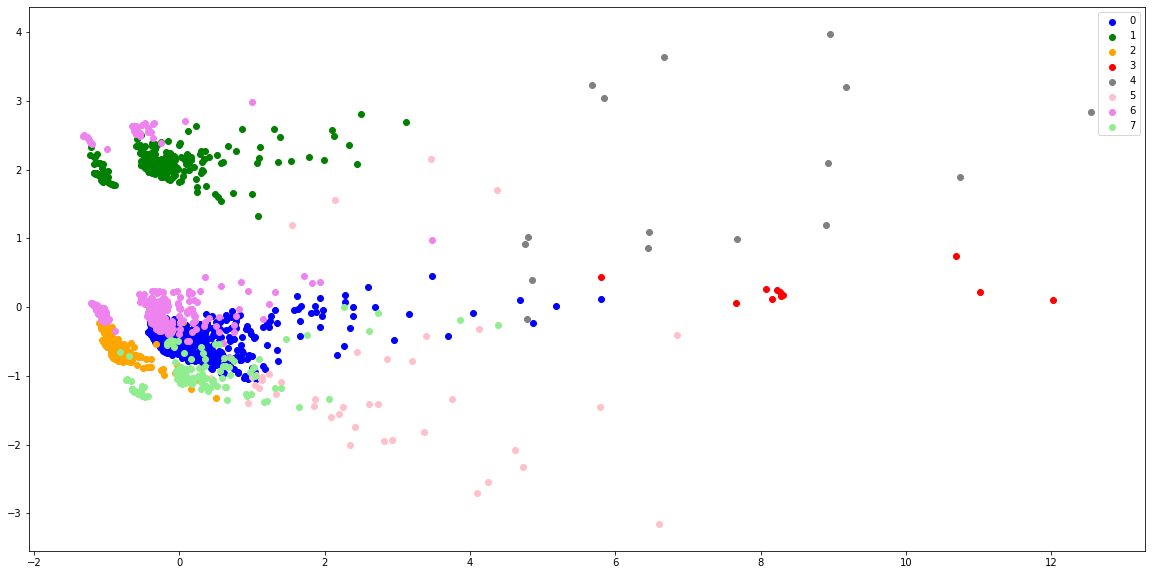

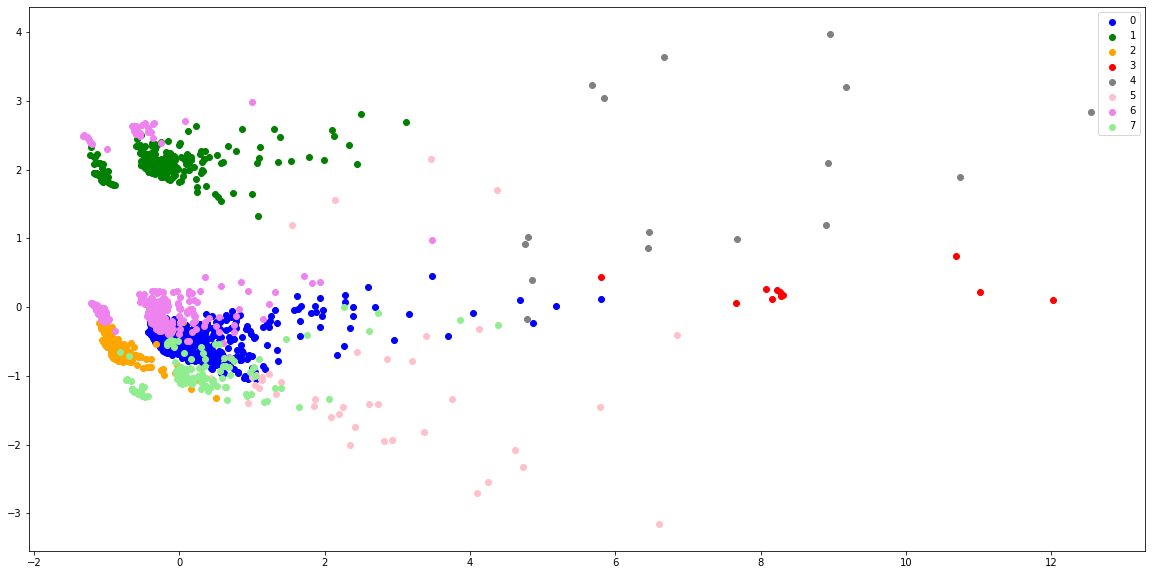

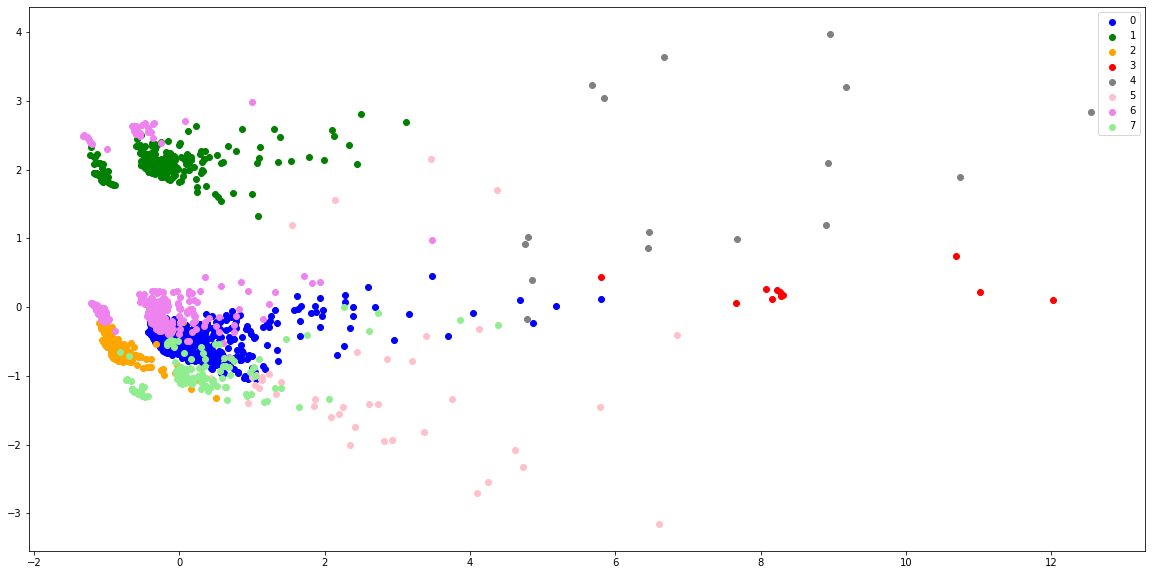

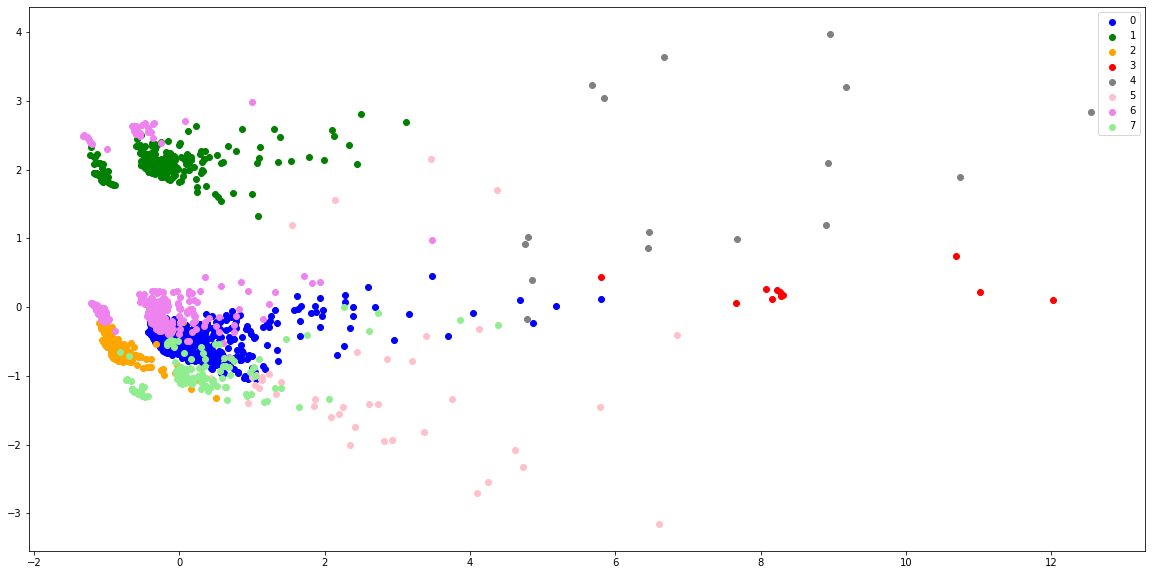

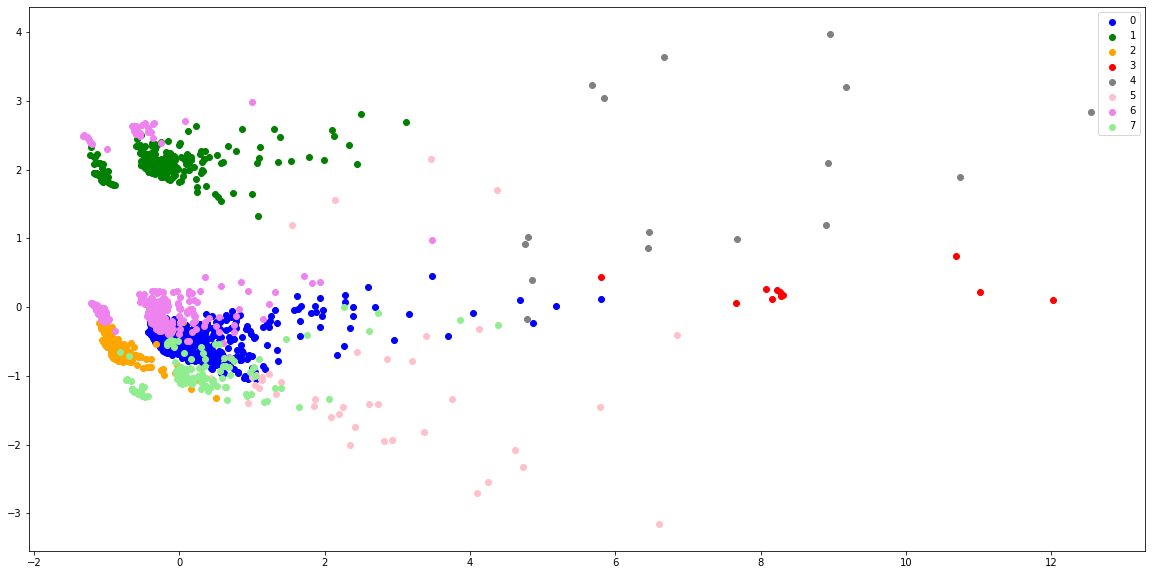

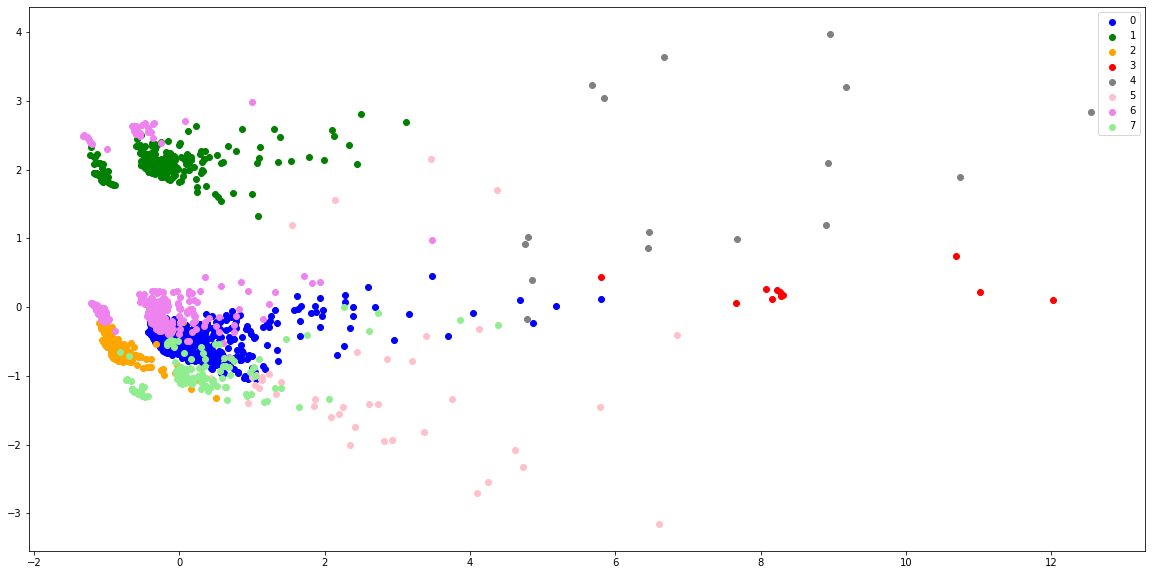

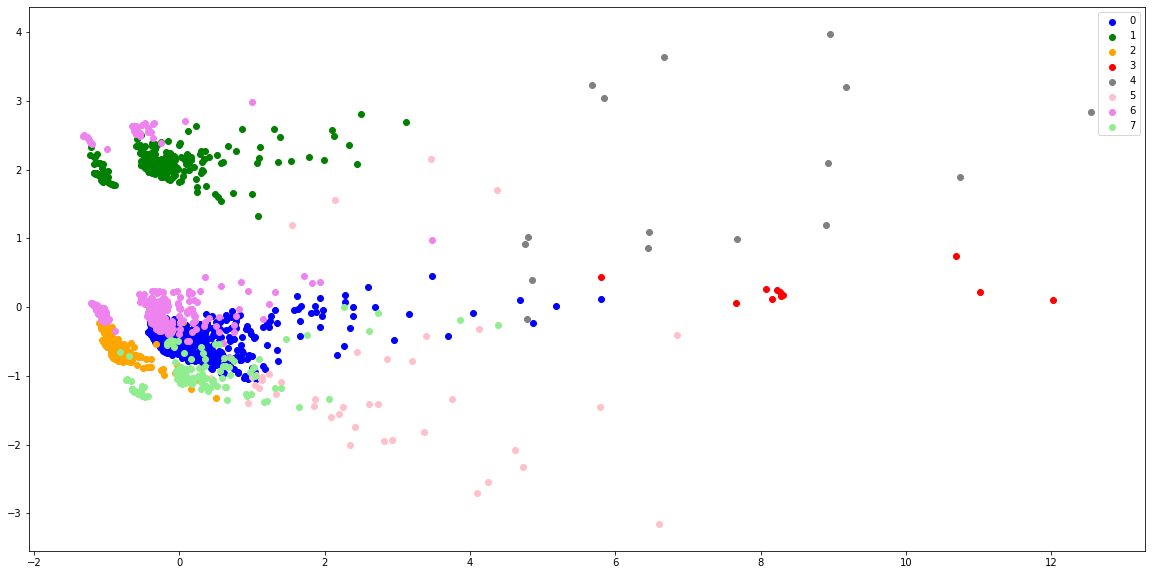

In [48]:
# K-Means
visualization(data_pca,kmeans_labels)

# Hierarchical Ward
visualization(data_pca,hierarchical_ward_labels)

# Hierarchical Complete
visualization(data_pca,hierarchical_complete_labels)

# Hierarchical Average
visualization(data_pca,hierarchical_average_labels)

# Spectral NN
visualization(data_pca,spectral_nn_labels)

# Spectral RBF
visualization(data_pca,spectral_rbf_labels)

# GMM
visualization(data_pca,gmm_labels)

# DBSCAN
visualization(data_pca,dbscan_labels)

### Interpretation

In [49]:
data_cluster_nonus = data_train_pos_scaled_nonus.copy()
data_cluster_inv_nonus = data_train_pos_nonus.copy()
data_cluster_nonus = data_cluster_nonus[top_50_columns[:numberofcols]]
data_cluster_inv_nonus = data_cluster_inv_nonus[top_50_columns[:numberofcols]]

data_cluster_nonus['cluster'] = gmm_labels.astype(int)
data_cluster_inv_nonus['cluster'] = gmm_labels.astype(int)

for row in range((cluster_outlier.shape[0])):
    cluster_outlier.loc[row,'cluster'] = int(len(np.unique(gmm_labels))+row)
    cluster_outlier_scaled.loc[row,'cluster'] = int(len(np.unique(gmm_labels))+row)
    
outlier_clusters = list(cluster_outlier['cluster'].unique().astype(int))

data_cluster_nonus = pd.concat([data_cluster_nonus,cluster_outlier_scaled],0).reset_index().drop('index',1)
data_cluster_inv_nonus = pd.concat([data_cluster_inv_nonus,cluster_outlier],0).reset_index().drop('index',1)

cluster 0: low internal_total          | mod external_vs_internal          | mod total_employees                |
           low total_200_features      | does not belong to emp2           | high per_feature_307               |            does not belong to ind9
           
cluster 1: low internal_total          | mod external_vs_internal          | mod total_employees                |
           low total_200_features      | does not belong to emp2           | high per_feature_307               |            belongs to ind9
 
cluster 2: low internal_total          | mod external_vs_internal          | low total_employees                |
           low total_200_features      | belongs to emp2                   | high per_feature_307               |            does not belong to ind9

cluster 3: high internal_total         | low external_vs_internal          | high total_employees               |
           mod total_200_features      | does not belong to emp2           | mod per_feature_307                |            does not belong to ind9

cluster 4: mod internal_total          | high external_vs_internal         | high total_employees               |
           mod total_200_features      | does not belong to emp2           | mod per_feature_307                |            belongs to ind9

cluster 5: mod internal_total          | low external_vs_internal          | mod total_employees                |
           high total_200_features     | does not belong to emp2           | mod per_feature_307                |            does not belong to ind9

cluster 6: mod internal_total          | mod external_vs_internal          | mod total_employees                |
           low total_200_features      | does not belong to emp2           | zero per_feature_307               |            does not belong to ind9
           
cluster 7: low internal_total          | extreme external_vs_internal      | mod total_employees                |
           low total_200_features      | does not belong to emp2           | mod per_feature_307                |            does not belong to ind9
 
cluster 8: extreme internal_total      | high external_vs_internal         | low total_employees                |
           mod total_200_features      | does not belong to emp2           | mod per_feature_307                |            does not belong to ind9

cluster 9: high internal_total         | high external_vs_internal         | extreme total_employees            |
           mod total_200_features      | does not belong to emp2           | mod per_feature_307                |            does not belong to ind9

In [50]:
data_cluster_inv_nonus.groupby('cluster').describe().round(2)

internal_total                                            \
                 count          mean           std           min   
cluster                                                            
0.0              929.0  9.144504e+06  1.237303e+07  7.098500e+04   
1.0              316.0  4.841640e+06  5.037161e+06  6.516600e+04   
2.0              341.0  2.558128e+06  2.447929e+06  4.589200e+04   
3.0               96.0  2.511784e+08  3.602849e+08  2.710310e+05   
4.0               74.0  7.807873e+07  9.376710e+07  4.902988e+06   
5.0               33.0  2.600291e+07  3.930030e+07  8.852600e+04   
6.0               92.0  1.330967e+07  1.970443e+07  1.056570e+05   
7.0              106.0  9.600415e+06  1.501209e+07  5.376600e+04   
8.0                1.0  1.010192e+10           NaN  1.010192e+10   
9.0                1.0  9.271773e+08           NaN  9.271773e+08   

                                                                 \
                  25%           50%           75%           max   
cluster                                                           
0.0      2.286947e+06  5.179952e+06  8.732368e+06  7.059280e+07   
1.0      1.034029e+06  4.232780e+06  5.677161e+06  2.197171e+07   
2.0      5.103280e+05  1.414533e+06  5.179952e+06  1.671883e+07   
3.0      6.313933e+07  1.093909e+08  2.170690e+08  1.578516e+09   
4.0      1.503767e+07  4.628263e+07  1.031124e+08  4.625338e+08   
5.0      2.706268e+06  5.179952e+06  4.161029e+07  1.585194e+08   
6.0      1.474318e+06  5.179952e+06  1.987311e+07  9.428486e+07   
7.0      1.107927e+06  3.726236e+06  9.995235e+06  7.959884e+07   
8.0      1.010192e+10  1.010192e+10  1.010192e+10  1.010192e+10   
9.0      9.271773e+08  9.271773e+08  9.271773e+08  9.271773e+08   

        external_vs_internal        ... per_feature_307         ind9        \
                       count  mean  ...             75%   max  count  mean   
cluster                             ...                                      
0.0                    929.0  3.22  ...            1.00  1.00  929.0  0.00   
1.0                    316.0  3.42  ...            1.00  1.00  316.0  1.00   
2.0                    341.0  3.43  ...            1.00  1.00  341.0  0.00   
3.0                     96.0  3.15  ...            1.00  1.00   96.0  0.00   
4.0                     74.0  3.99  ...            1.00  1.00   74.0  0.78   
5.0                     33.0  3.20  ...            0.99  1.00   33.0  0.00   
6.0                     92.0  3.85  ...            0.00  0.00   92.0  0.00   
7.0                    106.0  7.98  ...            1.00  1.00  106.0  0.00   
8.0                      1.0  4.32  ...            0.74  0.74    1.0  0.00   
9.0                      1.0  4.37  ...            0.35  0.35    1.0  0.00   

                                        
          std  min  25%  50%  75%  max  
cluster                                 
0.0      0.00  0.0  0.0  0.0  0.0  0.0  
1.0      0.00  1.0  1.0  1.0  1.0  1.0  
2.0      0.00  0.0  0.0  0.0  0.0  0.0  
3.0      0.00  0.0  0.0  0.0  0.0  0.0  
4.0      0.41  0.0  1.0  1.0  1.0  1.0  
5.0      0.00  0.0  0.0  0.0  0.0  0.0  
6.0      0.00  0.0  0.0  0.0  0.0  0.0  
7.0      0.00  0.0  0.0  0.0  0.0  0.0  
8.0       NaN  0.0  0.0  0.0  0.0  0.0  
9.0       NaN  0.0  0.0  0.0  0.0  0.0  

[10 rows x 56 columns]

In [51]:
cluster_summary_nonus = cluster_distance_summary(data_cluster_nonus)
cluster_summary_nonus = cluster_summary_nonus.sort_values('cluster')
cluster_summary_nonus.index = cluster_summary_nonus.cluster
cluster_summary_nonus = cluster_summary_nonus.drop('cluster',1)

for cluster in outlier_clusters:
    cluster_summary_nonus.iloc[cluster,] = cluster_summary_nonus.sort_values('meansd',ascending=False).iloc[0]
    
cluster_summary_nonus

,max,mean,meansd,median,min,oneq,std
cluster,,,,,,,
0,3.571968,0.978269,1.989501,0.822564,0.228735,0.688900,0.505616
1,3.266037,1.356177,2.693794,0.983114,0.593987,0.897269,0.668809
2,4.344659,1.227479,2.860410,0.886824,0.307763,0.732553,0.816465
3,15.073891,3.540730,9.081419,2.632746,1.173565,2.125687,2.770345
4,14.202828,3.926712,8.882386,3.334147,1.014966,2.554769,2.477837
5,10.545527,3.590443,7.661820,3.052321,1.168787,1.882043,2.035688
6,3.154293,0.902416,2.543295,0.674639,0.154534,0.332024,0.820439
7,2.730909,0.932326,2.044011,0.729502,0.128010,0.569011,0.555843
8,15.073891,3.540730,9.081419,2.632746,1.173565,2.125687,2.770345


In [52]:
data_cluster_test_nonus = find_cluster(data_cluster_nonus,cluster_test,cluster_summary_nonus,
                                       data_cluster_nonus.cluster.nunique(),
                                       data_train_neg_scaled_nonus.index)
data_cluster_test_nonus.cluster.value_counts()

100    2461
0       331
2       191
1       143
6        61
7        18
5        11
3         4
4         2
Name: cluster, dtype: int64

In [53]:
data_cluster_nonus = get_distance(data_cluster_nonus)

In [54]:
data_final_nonus = pd.concat([data_train_pos_nonus,outlier,data_train_neg_nonus],0)[data_train_pos_nonus.columns].reset_index().drop('index',1)
data_cluster_final_nonus = pd.concat([data_cluster_nonus,data_cluster_test_nonus],0).reset_index().drop('index',1)

data_final_nonus['cluster'] = data_cluster_final_nonus['cluster']
data_final_nonus['distance'] = data_cluster_final_nonus['distance']

In [55]:
data_final_nonus.to_csv('../data/clustering/nonus_data_cluster_predictions.csv',index=False)
cluster_summary_nonus.to_csv('../data/clustering/cluster_summary_nonus.csv',index=False)
data_cluster_nonus.to_csv('../data/clustering/data_cluster_nonus.csv',index=False)
joblib.dump(gmm_cluster, '../data/pkl/gmm_cluster_nonus.pkl')

['../data/pkl/gmm_cluster_nonus.pkl']

# 7. Comparing

We have compared the results of clustering and classification methods.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_rf = pd.read_csv('../data/rf/rf_predictions_train_data.csv')
data_us_cluster = pd.read_csv('../data/clustering/us_data_cluster_predictions.csv')
data_nonus_cluster = pd.read_csv('../data/clustering/nonus_data_cluster_predictions.csv')

data_us_cluster_select = data_us_cluster[['company_id','US','cloud_flag','cluster','distance']]
data_nonus_cluster_select = data_nonus_cluster[['company_id','US','cloud_flag','cluster','distance']]
data_rf_select = data_rf[['company_id','predict','p0','p1']]

data_us = pd.merge(data_us_cluster_select,data_rf_select,on='company_id',how='inner')
data_nonus = pd.merge(data_nonus_cluster_select,data_rf_select,on='company_id',how='inner')

In [3]:
data_us['predict_type'] = np.where((data_us['cloud_flag']==1)&(data_us['predict']==1),'tp',
                          np.where((data_us['cloud_flag']==1)&(data_us['predict']==0),'fn',
                          np.where((data_us['cloud_flag']==0)&(data_us['predict']==1),'fp',
                          np.where((data_us['cloud_flag']==0)&(data_us['predict']==0),'tn',np.nan))))

data_nonus['predict_type'] = np.where((data_nonus['cloud_flag']==1)&(data_nonus['predict']==1),'tp',
                             np.where((data_nonus['cloud_flag']==1)&(data_nonus['predict']==0),'fn',
                             np.where((data_nonus['cloud_flag']==0)&(data_nonus['predict']==1),'fp',
                             np.where((data_nonus['cloud_flag']==0)&(data_nonus['predict']==0),'tn',np.nan))))

In [4]:
data_nonus['cluster'] = np.where(data_nonus['cluster']!=100,
                                 data_nonus['cluster']+6,
                                 data_nonus['cluster'])

In [5]:
for c in data_us['cluster'].unique():
    vars()['us_cluster_'+str(int(c))] = data_us[data_us['cluster']==c]
    min_val = vars()['us_cluster_'+str(int(c))]['distance'].min()
    max_val = vars()['us_cluster_'+str(int(c))]['distance'].max()
    range_val = max_val-min_val
    vars()['us_cluster_'+str(int(c))]['distance_normal'] = (vars()['us_cluster_'+str(int(c))]['distance']-min_val)/range_val
    vars()['us_cluster_'+str(int(c))]['hvalue'] = ((2*vars()['us_cluster_'+str(int(c))]['p0']*
                                                    vars()['us_cluster_'+str(int(c))]['distance_normal'])/
                                                   (vars()['us_cluster_'+str(int(c))]['p0']+
                                                    vars()['us_cluster_'+str(int(c))]['distance_normal']))
    
for c in data_nonus['cluster'].unique():
    vars()['nonus_cluster_'+str(int(c))] = data_nonus[data_nonus['cluster']==c]
    min_val = vars()['nonus_cluster_'+str(int(c))]['distance'].min()
    max_val = vars()['nonus_cluster_'+str(int(c))]['distance'].max()
    range_val = max_val-min_val
    vars()['nonus_cluster_'+str(int(c))]['distance_normal'] = (vars()['nonus_cluster_'+str(int(c))]['distance']-min_val)/range_val
    vars()['nonus_cluster_'+str(int(c))]['hvalue'] = ((2*vars()['nonus_cluster_'+str(int(c))]['p0']*
                                                    vars()['nonus_cluster_'+str(int(c))]['distance_normal'])/
                                                   (vars()['nonus_cluster_'+str(int(c))]['p0']+
                                                    vars()['nonus_cluster_'+str(int(c))]['distance_normal']))

In [6]:
all_us_clusters = pd.concat([us_cluster_0,us_cluster_1,us_cluster_2,us_cluster_3,us_cluster_4,us_cluster_5,
                             us_cluster_100],axis=0)

all_non_clusters = pd.concat([nonus_cluster_6,nonus_cluster_7,nonus_cluster_8,nonus_cluster_9,
                              nonus_cluster_10,nonus_cluster_11,nonus_cluster_12,nonus_cluster_13,nonus_cluster_14,
                              nonus_cluster_15,nonus_cluster_100],axis=0)

all_clusters = pd.concat([all_us_clusters,all_non_clusters],axis=0)

In [7]:
all_clusters['tp'] = np.where(all_clusters['predict_type']=='tp',1,0)
all_clusters_1 = all_clusters.groupby(['cluster']).agg(total=('company_id','count'),tp=('tp','sum')).reset_index()
all_clusters_1 = all_clusters_1[~all_clusters_1.cluster.isin([5,14,15,100])]
all_clusters_1['ratio'] = (all_clusters_1['tp'])/all_clusters_1['total']
all_clusters_1['ratio_normal'] = all_clusters_1['ratio']**3/((all_clusters_1['ratio']**3).sum())
all_clusters_1['rows'] = (all_clusters_1['ratio_normal']*200).apply(np.ceil)

In [8]:
all_clusters.groupby('cluster')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0.0,813.0,1.658750,0.539614,0.3630,1.52200,1.6100,1.76600,4.547
1.0,134.0,4.492567,1.036321,0.6630,4.42700,4.6820,4.82850,5.926
2.0,492.0,3.523944,1.706244,0.1925,4.06200,4.1050,4.14500,6.023
3.0,197.0,3.863172,1.084799,0.4678,4.00800,4.1050,4.21500,5.190
4.0,84.0,7.503643,2.549659,2.2910,6.41925,6.9930,7.68750,23.450
5.0,1.0,56.030000,NaN,56.0300,56.03000,56.0300,56.03000,56.030
6.0,1260.0,1.324615,0.540798,0.0756,0.68175,1.5155,1.62200,3.781
7.0,459.0,2.558127,1.210607,0.5894,0.89130,3.0760,3.23050,4.613
8.0,532.0,3.108085,1.916272,0.2874,0.69130,4.1025,4.18250,6.973


# 8. Testing

We have checked how the clusters are performing on the holdout set.

In [5]:
import pandas as pd
import numpy as np
import scipy

import warnings
warnings.filterwarnings("ignore")

from sklearn.externals import joblib 

In [6]:
data_test = pd.read_csv('../data/imputed/test_with_mvt.csv')

cluster_summary_us = pd.read_csv("../data/clustering/cluster_summary_us.csv")
cluster_summary_nonus = pd.read_csv("../data/clustering/cluster_summary_nonus.csv")

data_cluster_us = pd.read_csv("../data/clustering/data_cluster_us.csv")
data_cluster_nonus = pd.read_csv("../data/clustering/data_cluster_nonus.csv")

scaler = joblib.load('../data/pkl/standardscaler.pkl')

drop_columns = ['company_id','group','cloud_flag']
top_50_columns = ['internal_total','external_vs_internal','total_employees','total_200_features','emp2',
                  'per_feature_307','ind9','emp7']
numberofcols = 7

data_test_us = data_test[data_test.US==1]
data_test_nonus = data_test[data_test.US==0]

data_test_us_scaled = scaler.transform(data_test_us.drop(drop_columns,1))
data_test_us_scaled = pd.concat([pd.DataFrame(data_test_us_scaled, 
                                            columns=data_test_us.drop(drop_columns,1).columns,
                                            index=data_test_us.index),
                                data_test_us[drop_columns]],1)

data_test_nonus_scaled = scaler.transform(data_test_nonus.drop(drop_columns,1))
data_test_nonus_scaled = pd.concat([pd.DataFrame(data_test_nonus_scaled, 
                                            columns=data_test_nonus.drop(drop_columns,1).columns,
                                            index=data_test_nonus.index),
                                data_test_nonus[drop_columns]],1)

data_test_us_scaled = data_test_us_scaled[top_50_columns[:numberofcols]]
data_test_nonus_scaled = data_test_nonus_scaled[top_50_columns[:numberofcols]]

In [7]:
def find_cluster(train_data,test_data,summary,num_clusters,index,us_flag):
    clusters = np.empty(test_data.shape[0],np.int8)
    distances = np.empty(test_data.shape[0],np.float16)
    cluster_mean = train_data.groupby("cluster").mean().reset_index()
    for row in range(test_data.shape[0]):
        a = np.array(cluster_mean.iloc[:,1:])
        b = test_data[row,]
        b = b.reshape((-1,b.shape[0]))
        distance = scipy.spatial.distance.cdist(a, b, 'euclidean')
        if(us_flag):
            check_cluster = summary['median'].values.reshape((num_clusters,-1))-distance
        else:
            check_cluster = summary['oneq'].values.reshape((num_clusters,-1))-distance
        cluster = np.where(check_cluster > 0, distance, np.inf)
        if(cluster.min()==np.inf):
            clusters[row]=100
            distances[row] = np.nan
        else:
            clusters[row] = cluster.argmin()
            distances[row] = distance[cluster.argmin()]
    test_data = pd.DataFrame(test_data,columns=top_50_columns[:numberofcols],index=index)
    test_data['cluster'] = clusters
    test_data['distance'] = distances
    return test_data

In [8]:
## Fitting US Data
data_cluster_test_us = find_cluster(data_cluster_us.drop('distance',1),np.array(data_test_us_scaled),
                                    cluster_summary_us,data_cluster_us.cluster.nunique(),
                                    data_test_us_scaled.index,True)
data_cluster_test_us.cluster.value_counts()

100    136
0       70
2       46
3       21
4       19
1       10
Name: cluster, dtype: int64

In [9]:
## Fitting Non-US Data
data_cluster_test_nonus = find_cluster(data_cluster_nonus.drop('distance',1),
                                       np.array(data_test_nonus_scaled),
                                       cluster_summary_nonus,
                                       data_cluster_nonus.cluster.nunique(),
                                       data_test_nonus_scaled.index,False)
data_cluster_test_nonus['cluster'] = np.where(data_cluster_test_nonus['cluster']!=100,
                                              data_cluster_test_nonus['cluster']+6,
                                              data_cluster_test_nonus['cluster'])
data_cluster_test_nonus.cluster.value_counts()

100    558
6       58
7       31
8       24
13       5
9        5
11       2
10       2
12       1
Name: cluster, dtype: int64

In [10]:
data_cluster_test = pd.concat([data_cluster_test_us,data_cluster_test_nonus],0)

In [11]:
#top_values = data_cluster_test.groupby('cluster')['distance'].apply(lambda x: x.sort_values()).reset_index()
#top_values = data_cluster_test.sort_values('distance').head(100)
#top_values.index = top_values['level_1']

In [13]:
# top_values_1 = pd.DataFrame()
# for c in list(all_clusters_1.cluster):
#     top_values_1 = pd.concat([top_values_1,
#                               top_values[top_values.cluster==c].head(int(all_clusters_1[all_clusters_1.cluster==c]['rows']))]
#                              ,0)
# top_values_1.index = top_values_1['level_1']

In [14]:
result = pd.merge(data_test['company_id'],data_cluster_test[['cluster','distance']],left_index=True,right_index=True)
#result = result[result.cluster!=100]

In [15]:
test_labels = pd.read_csv("../data/testing/test_labels.csv")

## Binany encoding cloud columns
test_labels['Google Cloud Platform'] = np.where(test_labels['Google Cloud Platform']=='Y',1,0)
test_labels['Amazon Web Services (AWS)'] = np.where(test_labels['Amazon Web Services (AWS)']=='Y',1,0)
test_labels['Microsoft Azure'] = np.where(test_labels['Microsoft Azure']=='Y',1,0)

## Creating target variable
test_labels['cloud_flag'] = test_labels.apply(lambda x: 1 if (x['Google Cloud Platform']==1)|
                                                       (x['Amazon Web Services (AWS)']==1)|
                                                       (x['Microsoft Azure']==1) else 0, axis=1)

test_labels.columns = [col.lower().replace(" ","_") for col in test_labels.columns]

In [16]:
result = pd.merge(result,test_labels[['company_id','cloud_flag']],how='left',on='company_id')

In [21]:
result.to_csv('../data/testing/test_result.csv',index=False)